## Anything interesting in econ data
### method: outlier detection

In [1]:
import geopandas as gpd
import matplotlib as plt
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from shapely.geometry import Point
import mapclassify as mc
%matplotlib inline

import seaborn as sns
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.dpi'] = 160
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [2]:
import mapclassify as mc

In [4]:
boundaries_fp='../Data/ProjectData/geo_export.shp'
boundaries=gpd.read_file(boundaries_fp)

ecodata15=pd.read_csv('../Data/ProjectData/econ15.csv')
ecodata16=pd.read_csv('../Data/ProjectData/econ16.csv')
ecodata17=pd.read_csv('../Data/ProjectData/econ17.csv')
# ecodata18=pd.read_csv('./data/econ/econ18.csv')

ecodata15.loc[ecodata15[ecodata15['GEOG']=='O\'Hare'].index,'GEOG']='ohare'
ecodata16.loc[ecodata16[ecodata16['GEOG']=='O\'Hare'].index,'GEOG']='ohare'
ecodata17.loc[ecodata17[ecodata17['GEOG']=='O\'Hare'].index,'GEOG']='ohare'
# ecodata18.loc[ecodata18[ecodata18['GEOG']=='O\'Hare'].index,'GEOG']='ohare'

ecodata15.loc[ecodata15[ecodata15['GEOG']=='The Loop'].index,'GEOG']='loop'
ecodata16.loc[ecodata16[ecodata16['GEOG']=='The Loop'].index,'GEOG']='loop'
ecodata17.loc[ecodata17[ecodata17['GEOG']=='The Loop'].index,'GEOG']='loop'
# ecodata18.loc[ecodata18[ecodata18['GEOG']=='The Loop'].index,'GEOG']='loop'


boundaries['GEOG']=boundaries['community'].str.lower()
ecodata15['GEOG']=ecodata15['GEOG'].str.lower()
ecodata16['GEOG']=ecodata15['GEOG'].str.lower()
ecodata17['GEOG']=ecodata15['GEOG'].str.lower()
# ecodata18['GEOG']=ecodata15['GEOG'].str.lower()



ecodata15=boundaries.merge(ecodata15, how='left',left_on='GEOG',right_on='GEOG').set_index('GEOG')
ecodata16=boundaries.merge(ecodata16, how='left',left_on='GEOG',right_on='GEOG').set_index('GEOG')
ecodata17=boundaries.merge(ecodata17, how='left',left_on='GEOG',right_on='GEOG').set_index('GEOG')
# ecodata18=boundaries.merge(ecodata18, how='left',left_on='GEOG',right_on='GEOG')


/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

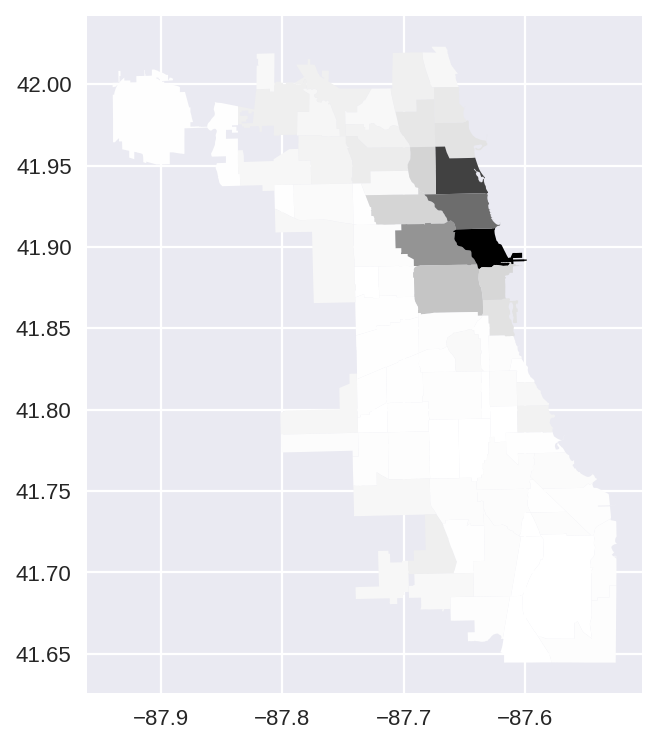

In [6]:
ecodata15.plot(column='INC_GT_150')

In [5]:
# spatial weights
wq =  lps.weights.Queen.from_dataframe(ecodata15)
wq.transform = 'r'

/tmp/ipykernel_3107689/332596086.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq =  lps.weights.Queen.from_dataframe(ecodata15)


In [165]:
def moran_scatter_plot(sel,wq,dfs,df_names,lable_ratio=1):
    fig, ax = plt.subplots(1, figsize=(9, 9))
    already_annotated_flag=False
    for df_name, df in zip(df_names,dfs):
        y = df[sel]
        ylag=lps.weights.lag_spatial(wq,y) #apply the spatial weights on the attribute

        ax.plot(y, ylag, '.', label=df_name)
        std=np.std(1-y/ylag) #calculate the ratio of spatial autocorrelation; able the ones away from label_ratio*std
#         print(std)
        if not already_annotated_flag:
            index=0
            for name,y1,ylag1 in zip(df.index,y,ylag):
                ratio=np.abs(1-y1/ylag1)
                if ratio>lable_ratio*std:
                    ax.annotate(name,(y1,ylag1))
                index+=1
            already_annotated_flag=True
                
         # dashed vert at mean of the price
#         plt.vlines(y.mean(), ylag.min(), ylag.max(), linestyle='--')
        #  # dashed horizontal at mean of lagged price
#         plt.hlines(ylag.mean(), y.min(), y.max(), linestyle='--')

        # red line of best fit using global I as slope
        try:
            b, a = np.polyfit(y, ylag, 1)
            plt.plot(y, a + b*y, label=df_name)
        except Exception as e:
            print(e)
    plt.title('Moran Scatterplot')
    plt.ylabel(f'Spatial Lag of {sel}')
    plt.xlabel(f'{sel}')
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.show()

In [163]:
# norm by population
norm_cols=['WHITE', 'HISP', 'BLACK', 'ASIAN', 'OTHER','UND19', 'A20_34',
       'A35_49', 'A50_64', 'A65_79', 'OV80',  'IN_LBFRC', 'EMP',
       'UNEMP', 'NOT_IN_LBFRC',  'INC_LT_25K', 'INC_25_50K',
       'INC_50_75K', 'INC_75_100K', 'INC_100_150K', 'INC_GT_150']

def norm_by_total_population(df):
    df_norm=df[norm_cols].div(df['TOT_POP'],axis=0)
    return df_norm
ecodata15_norm=norm_by_total_population(ecodata15)
ecodata16_norm=norm_by_total_population(ecodata16)
ecodata17_norm=norm_by_total_population(ecodata17)
ecodata18_norm=norm_by_total_population(ecodata18)

In [119]:
ecodata15[['ASIAN','TOT_POP']].head()

ASIAN  TOT_POP
GEOG                           
douglas           2452    19074
oakland            149     6247
fuller park         15     2867
grand boulevard    100    22386
kenwood           1155    18021

In [120]:
ecodata15_norm[['ASIAN']].head()

ASIAN
GEOG                     
douglas          0.128552
oakland          0.023851
fuller park      0.005232
grand boulevard  0.004467
kenwood          0.064092

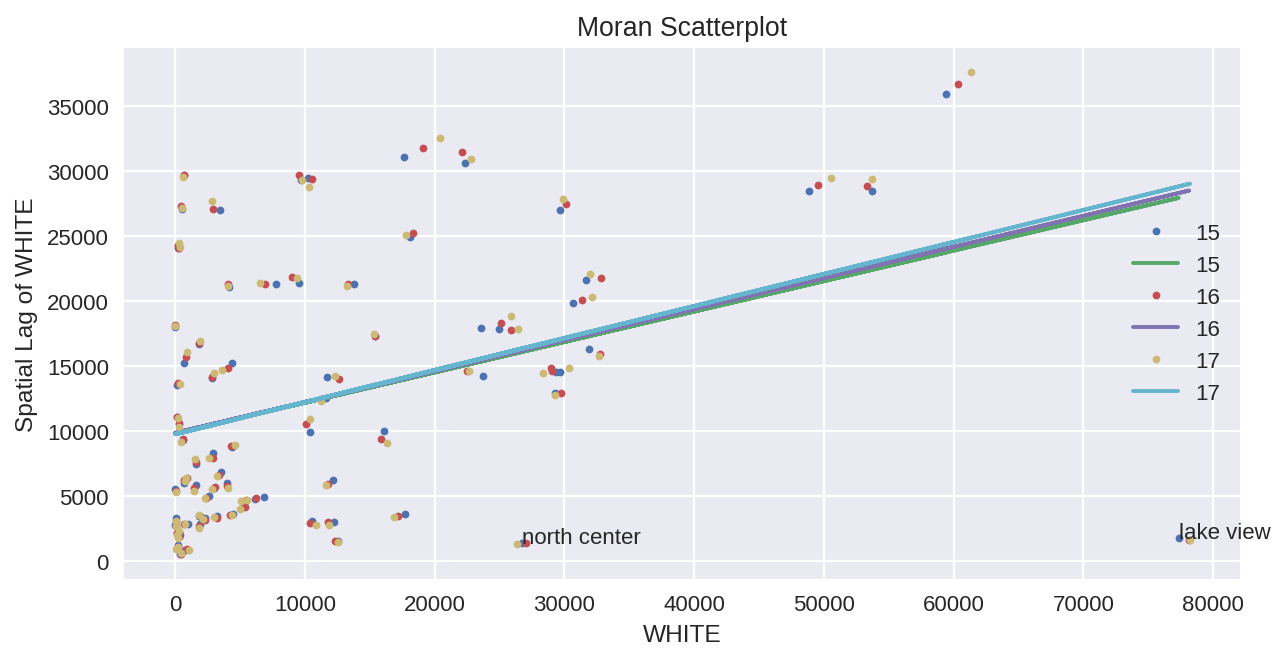

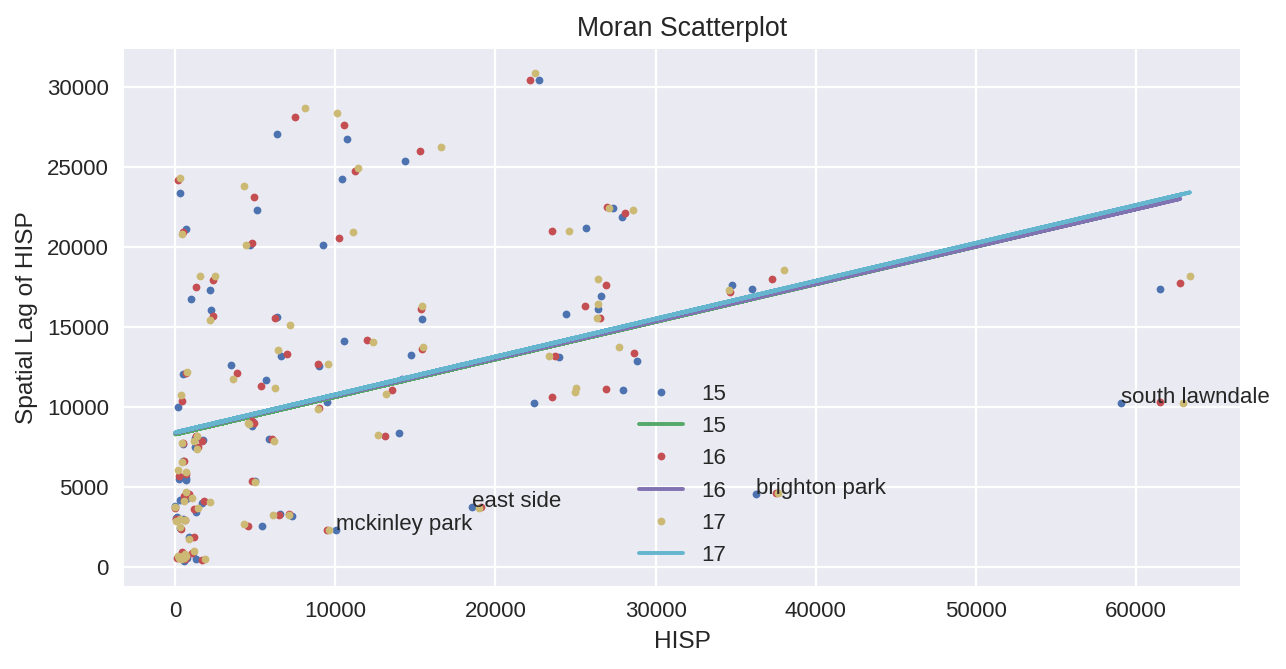

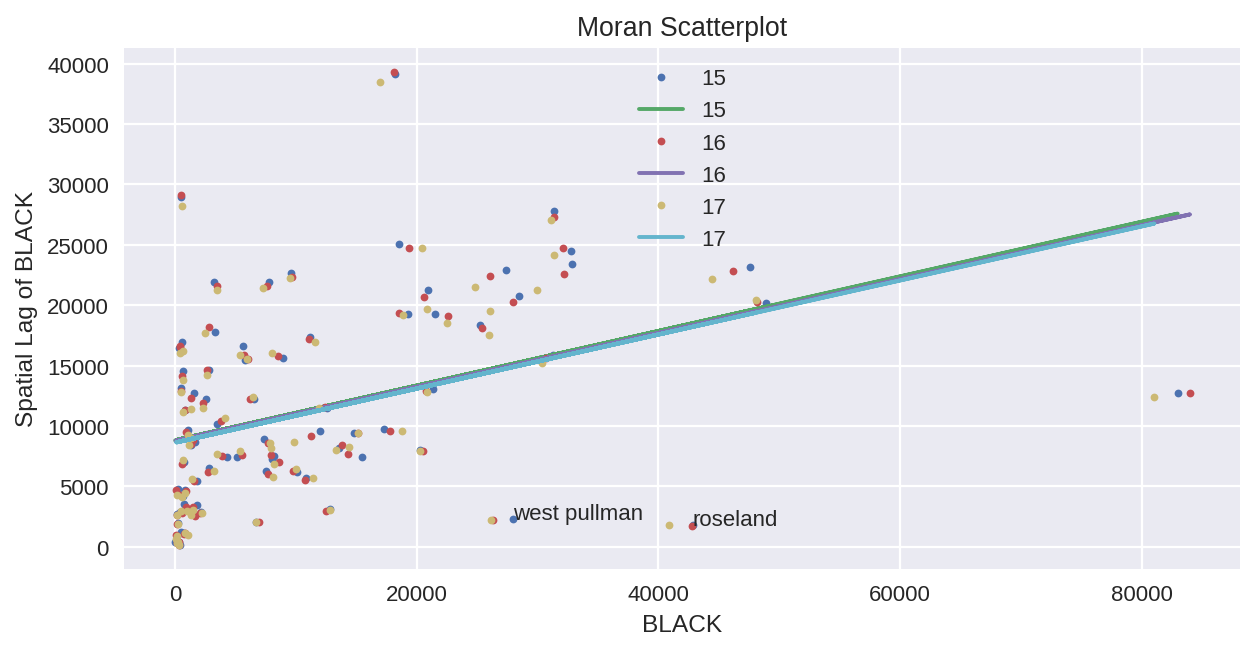

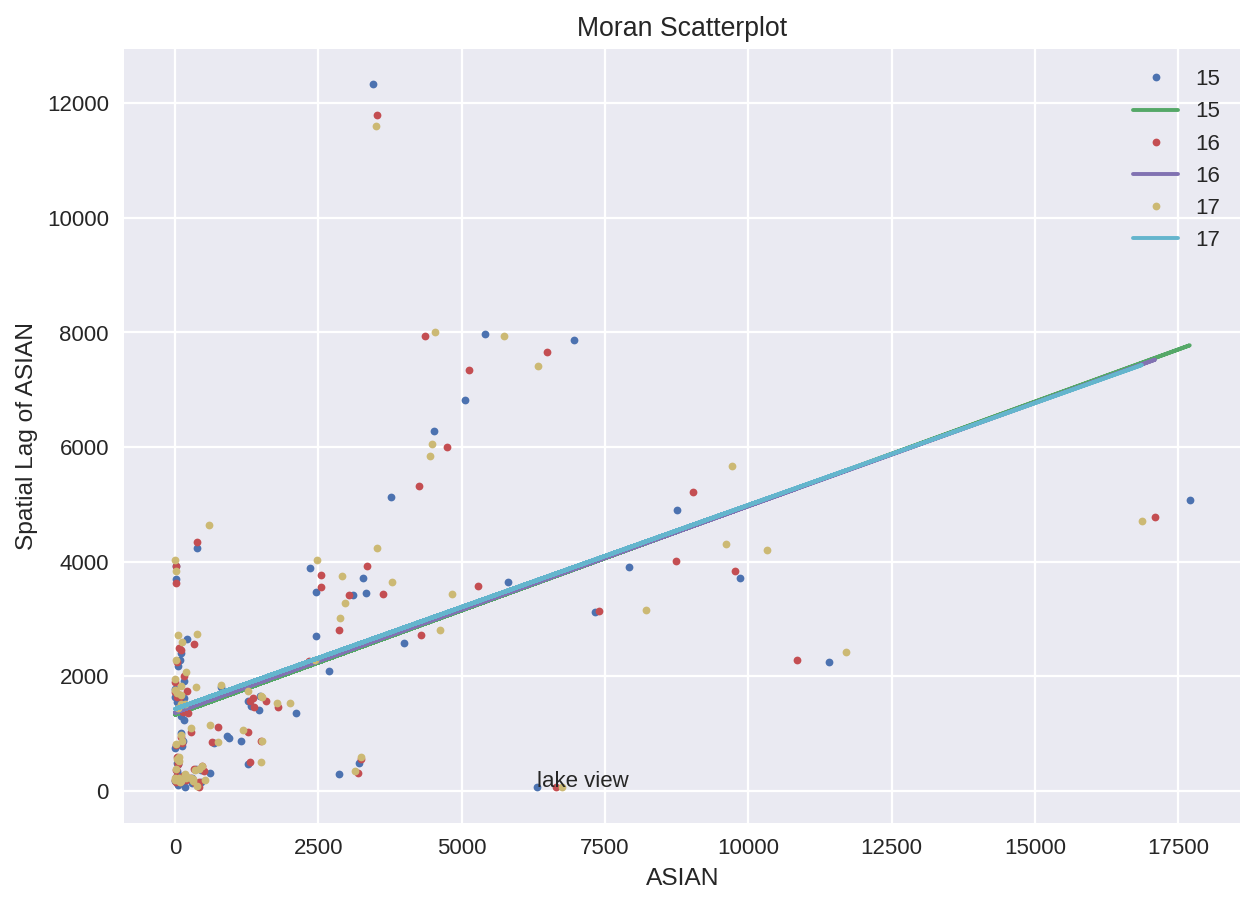

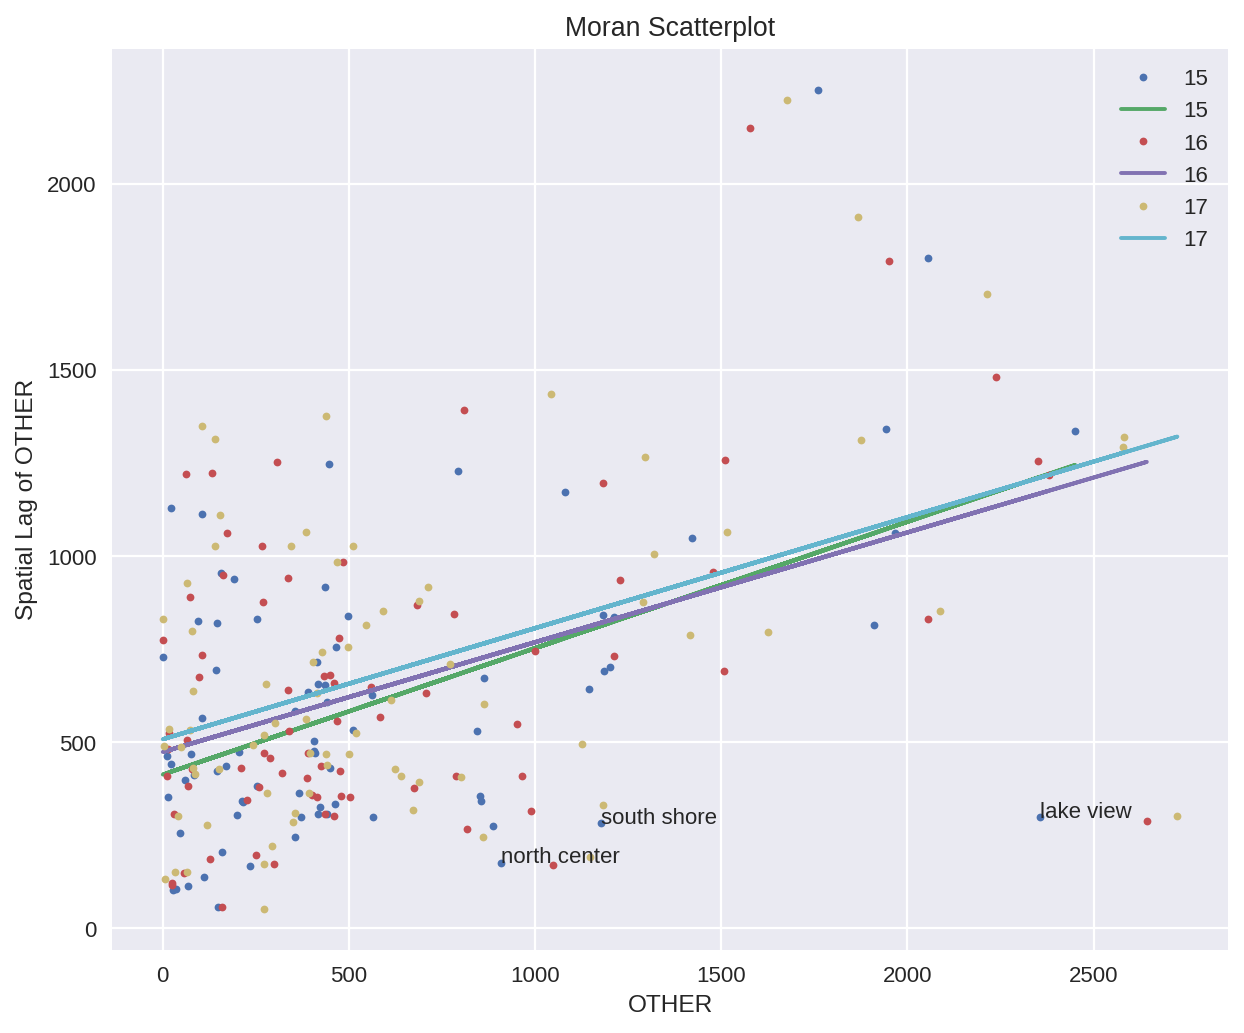

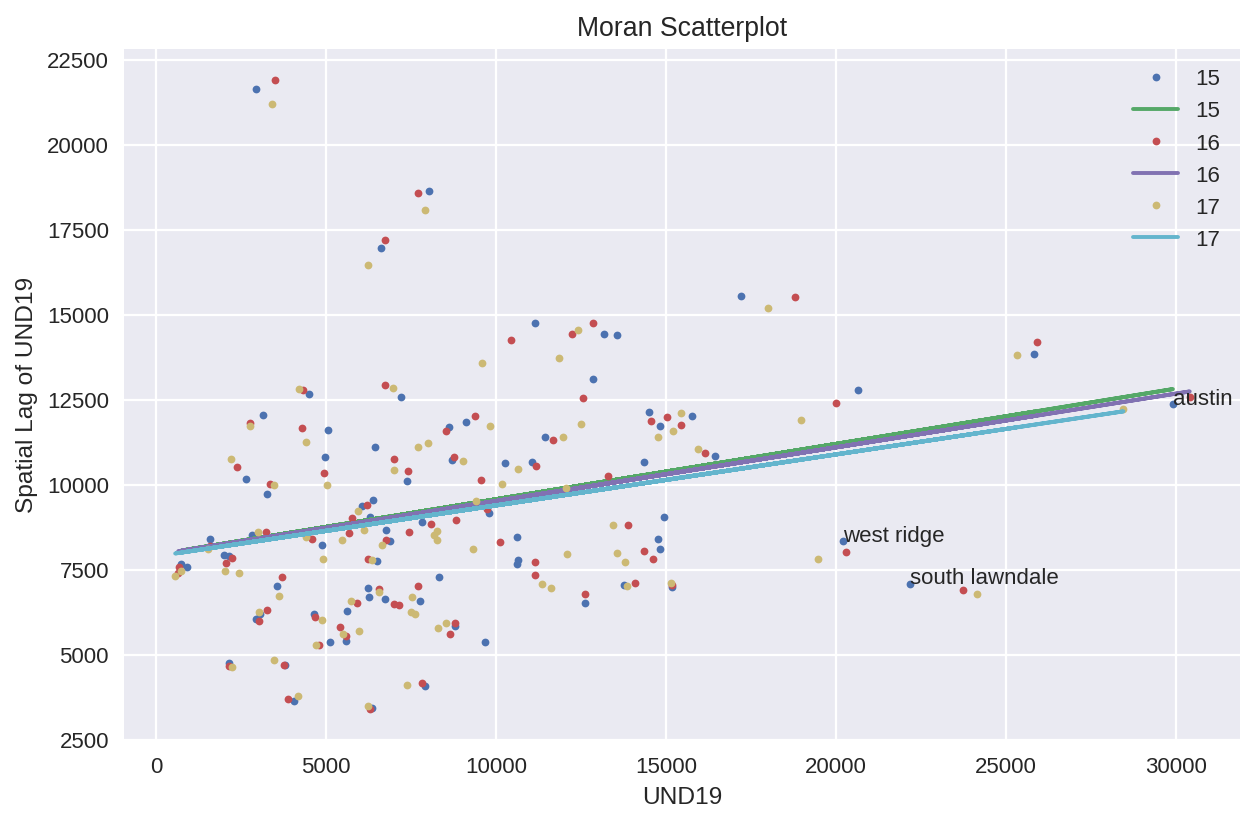

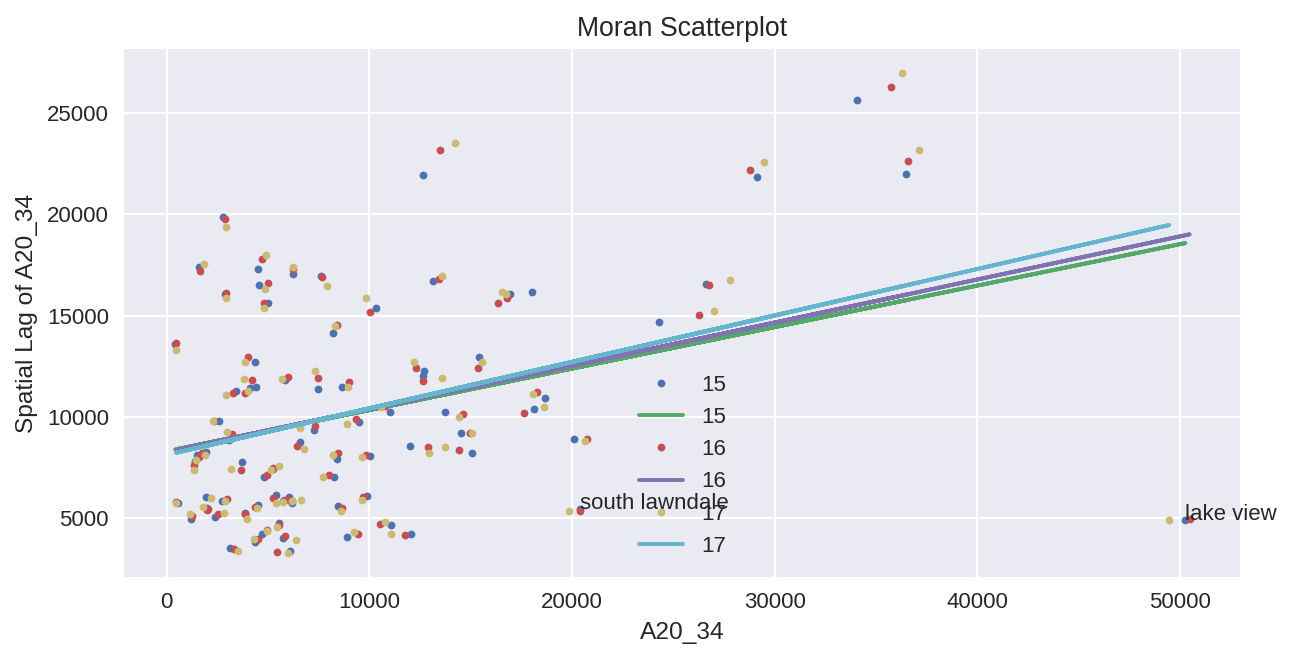

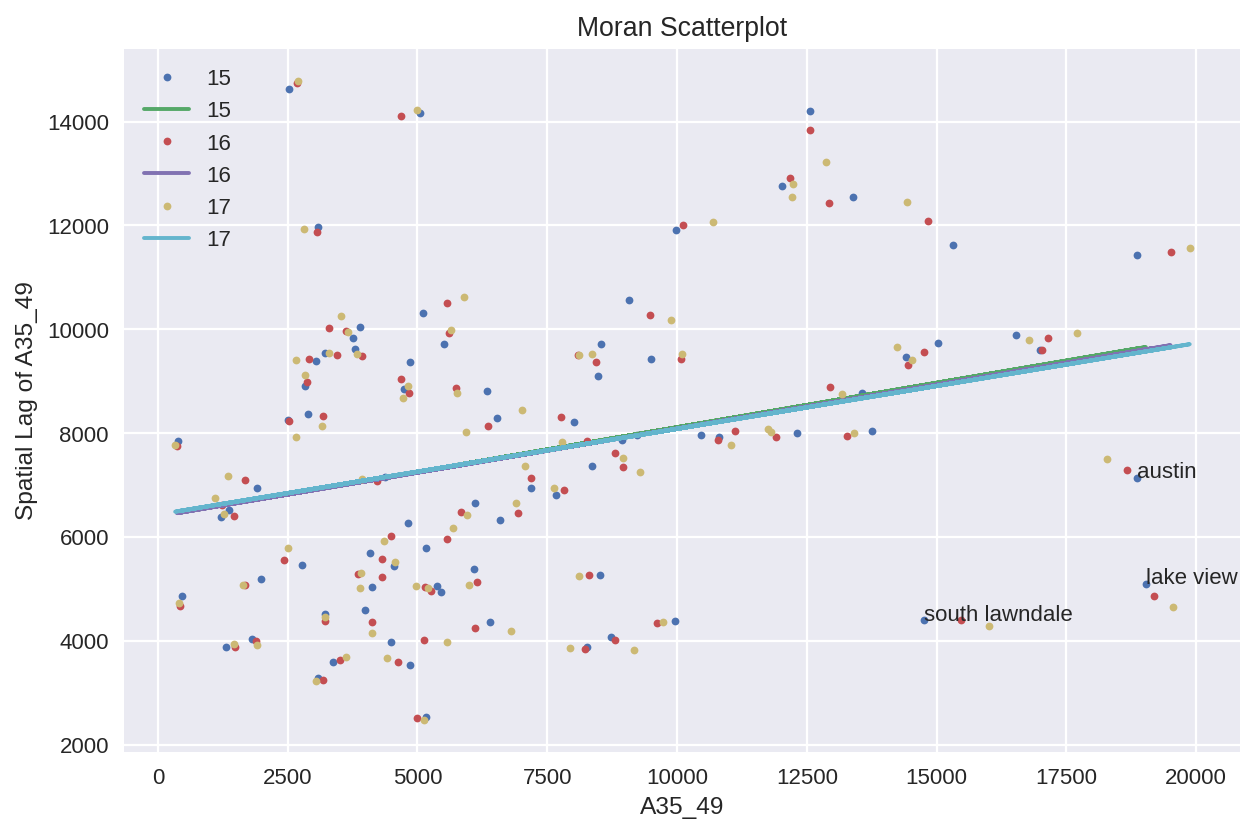

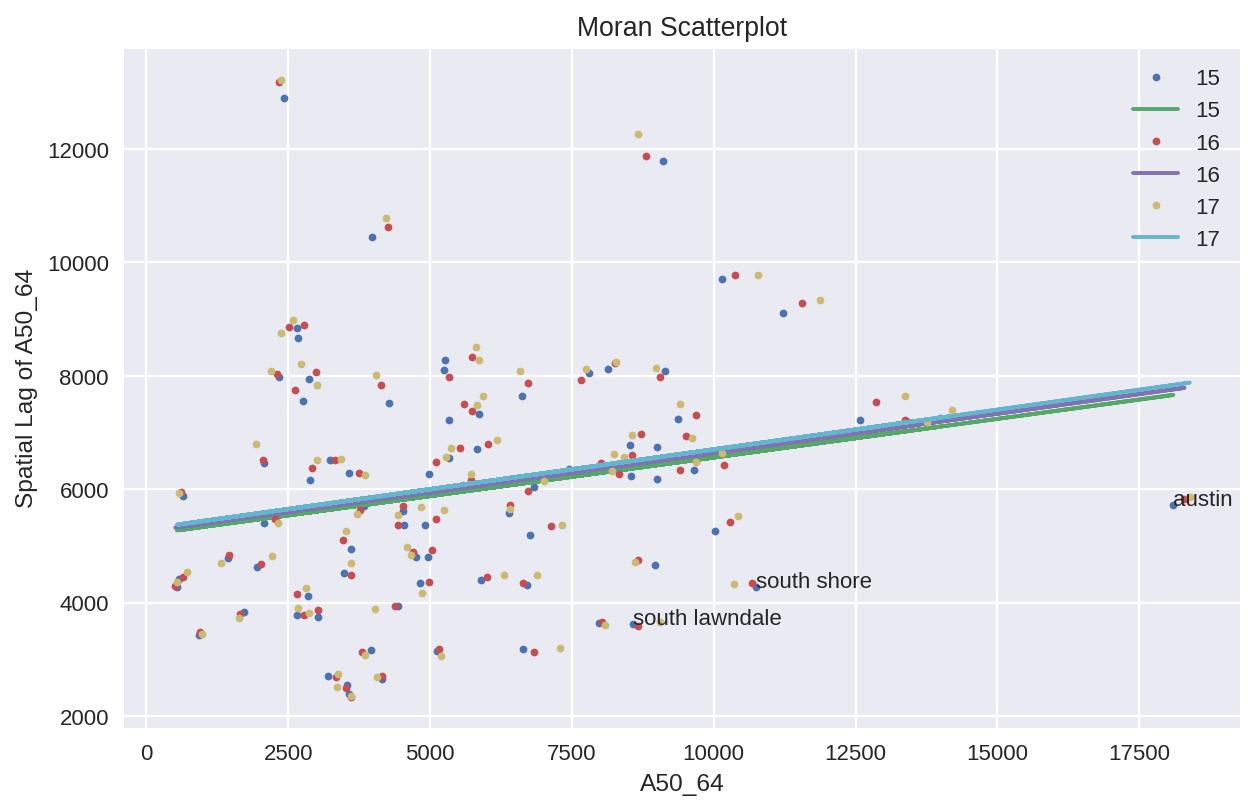

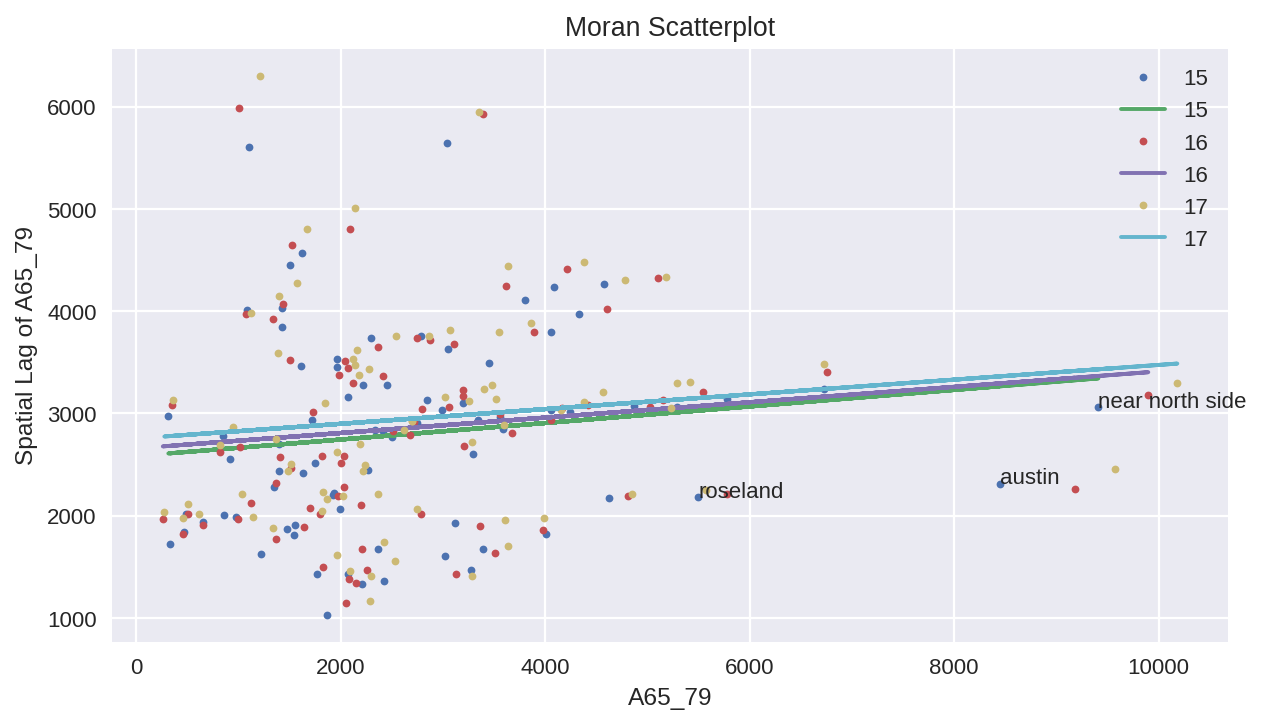

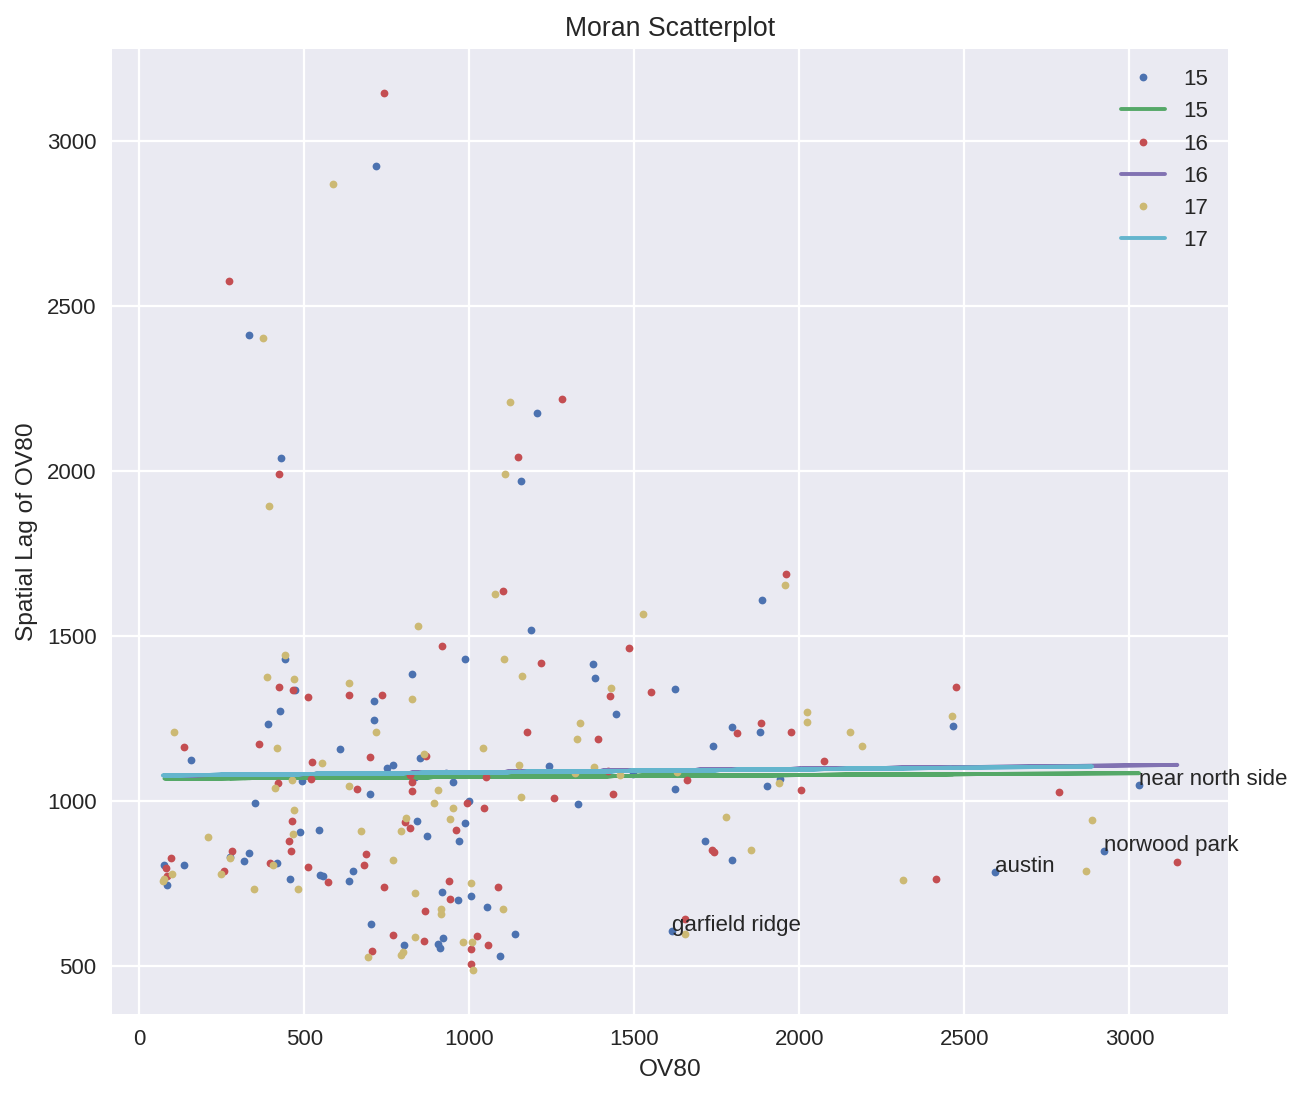

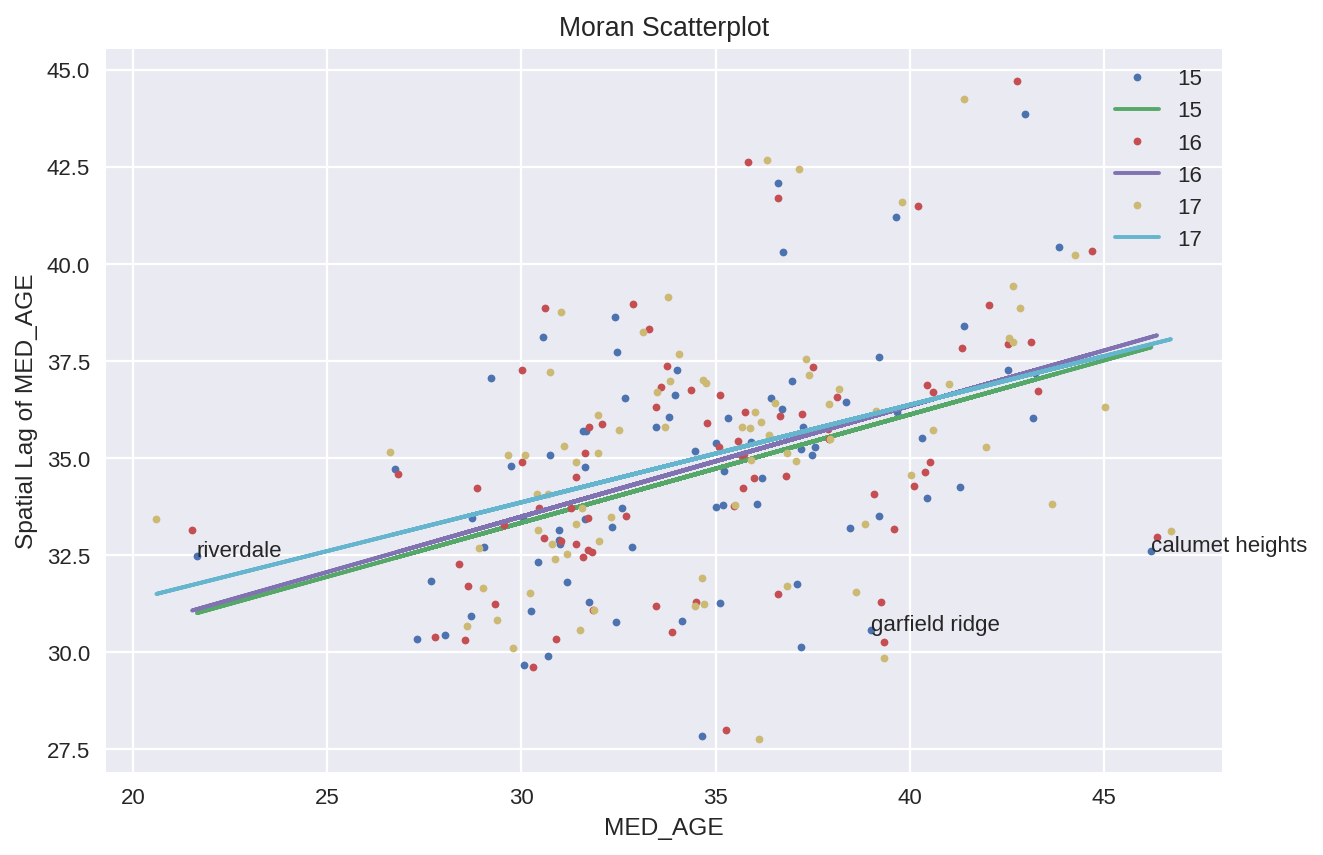

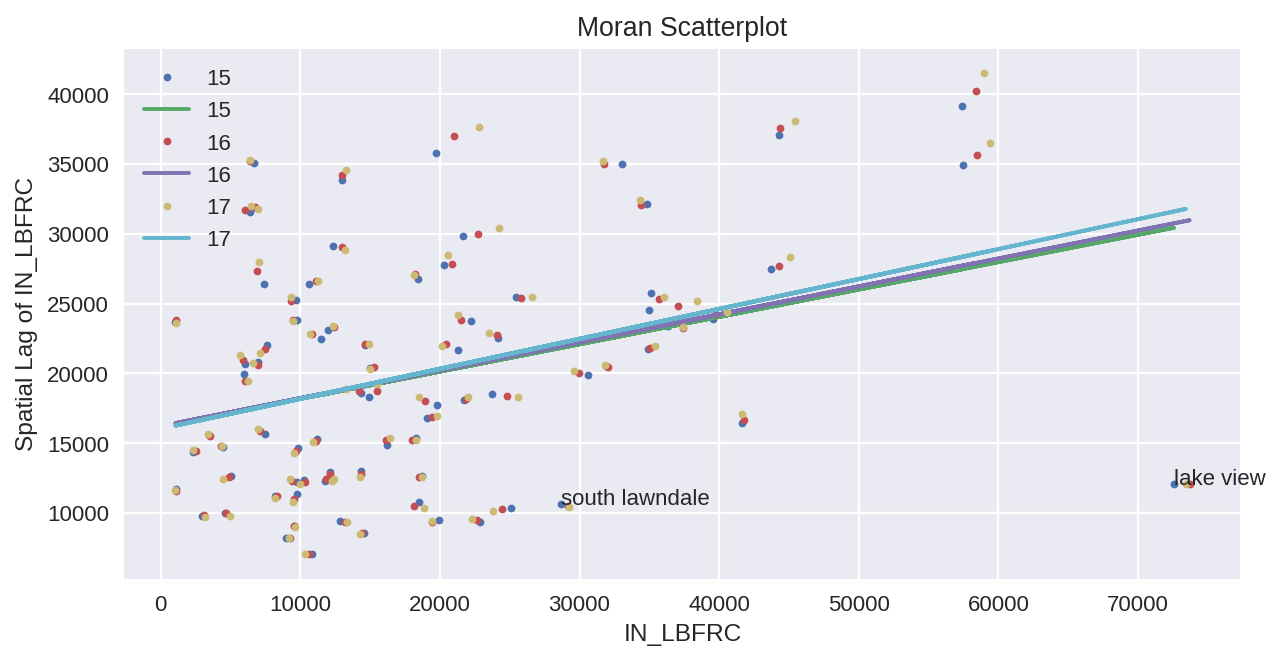

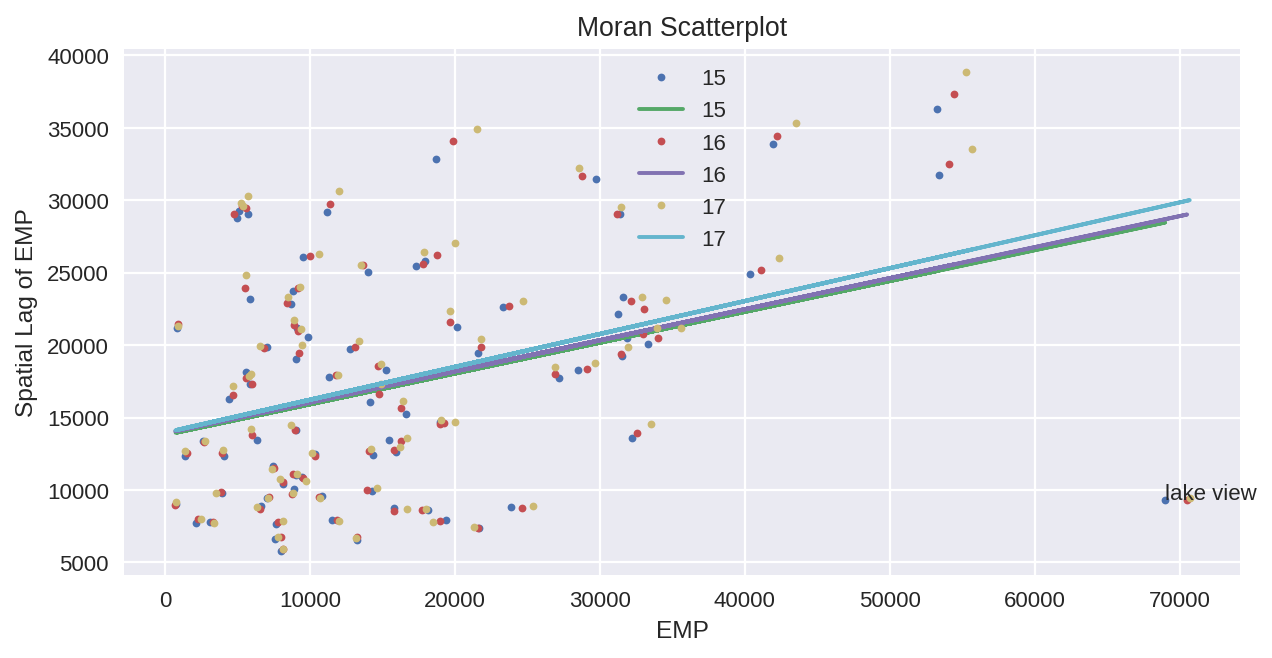

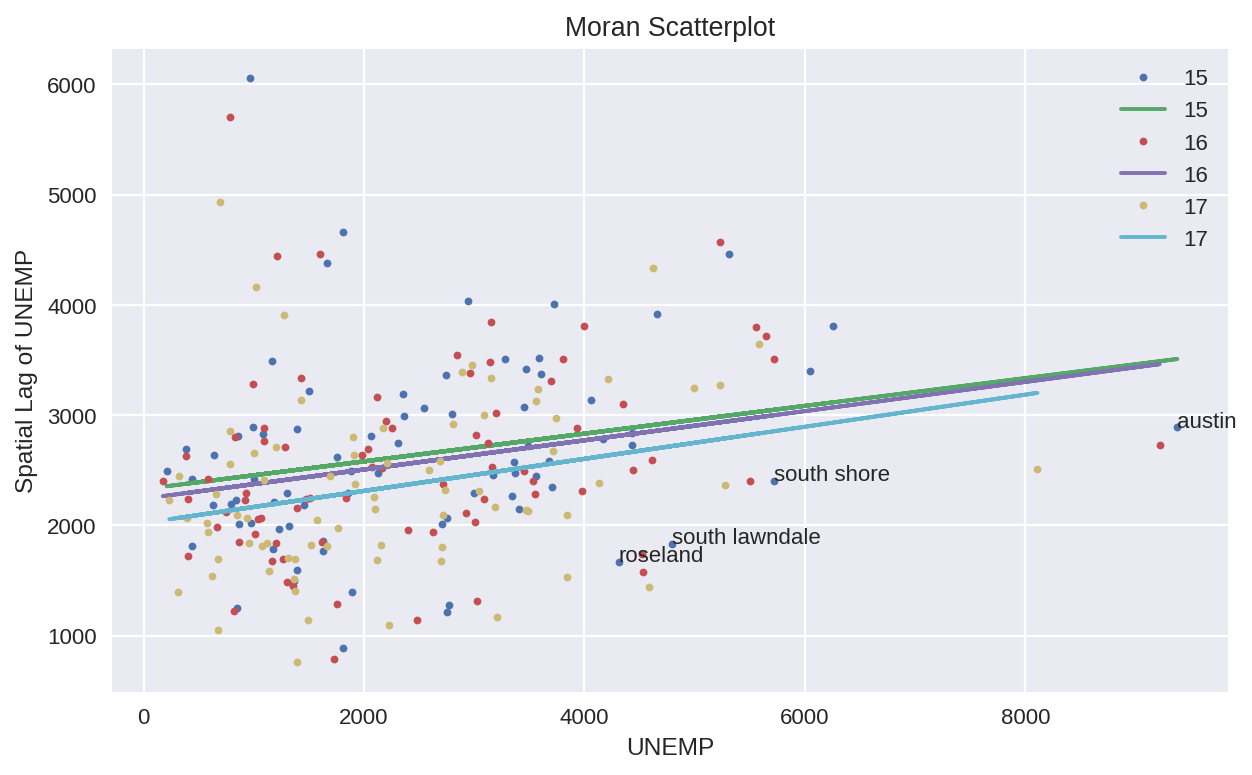

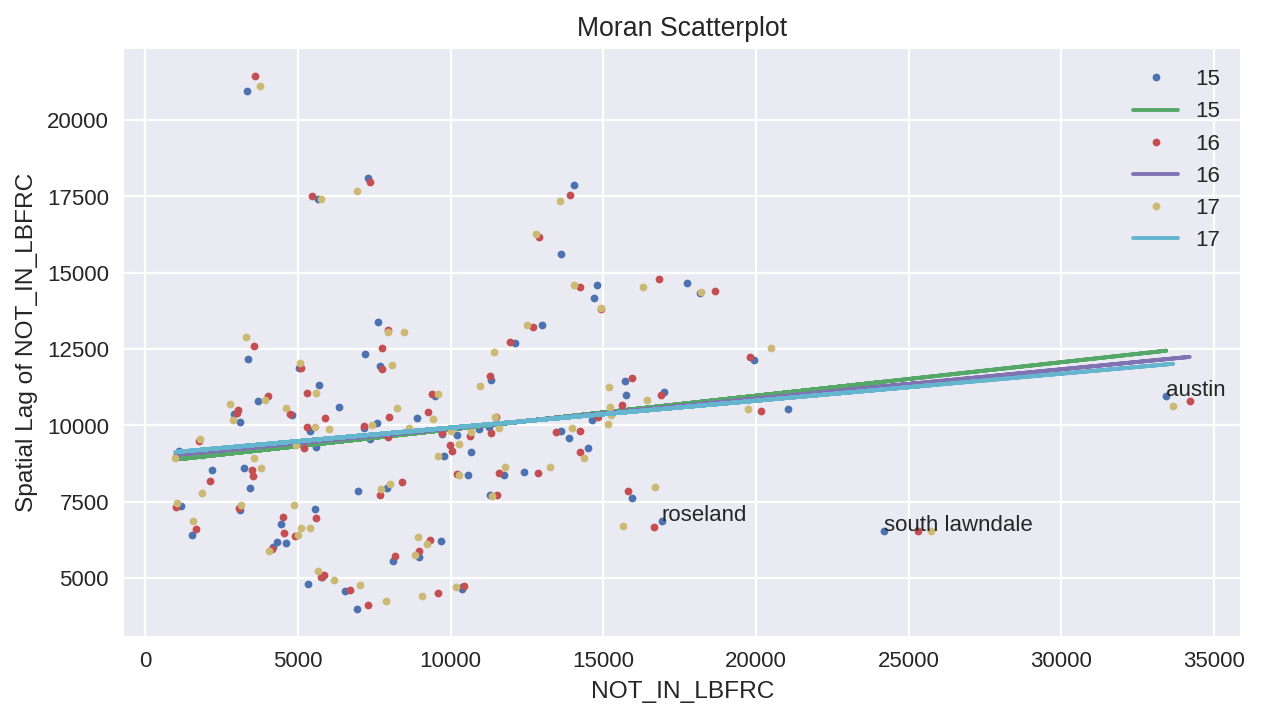

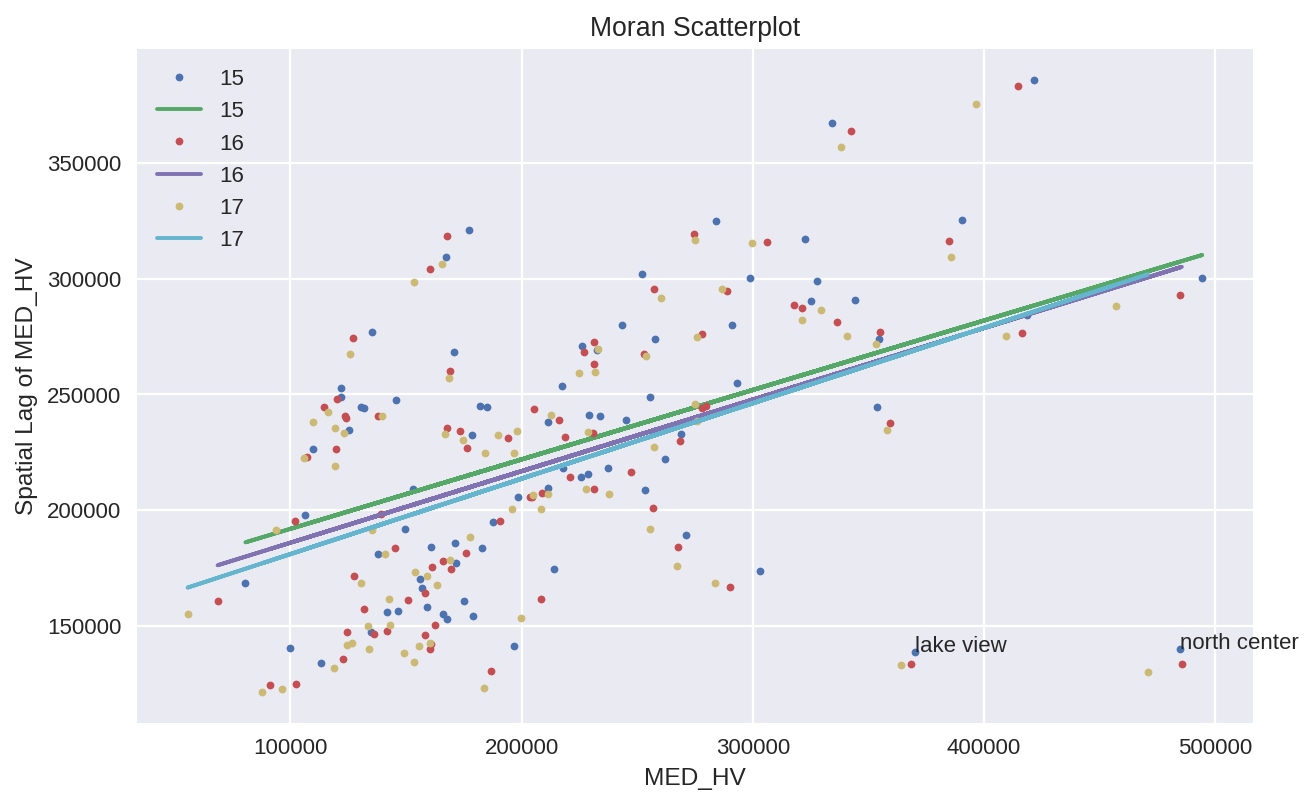

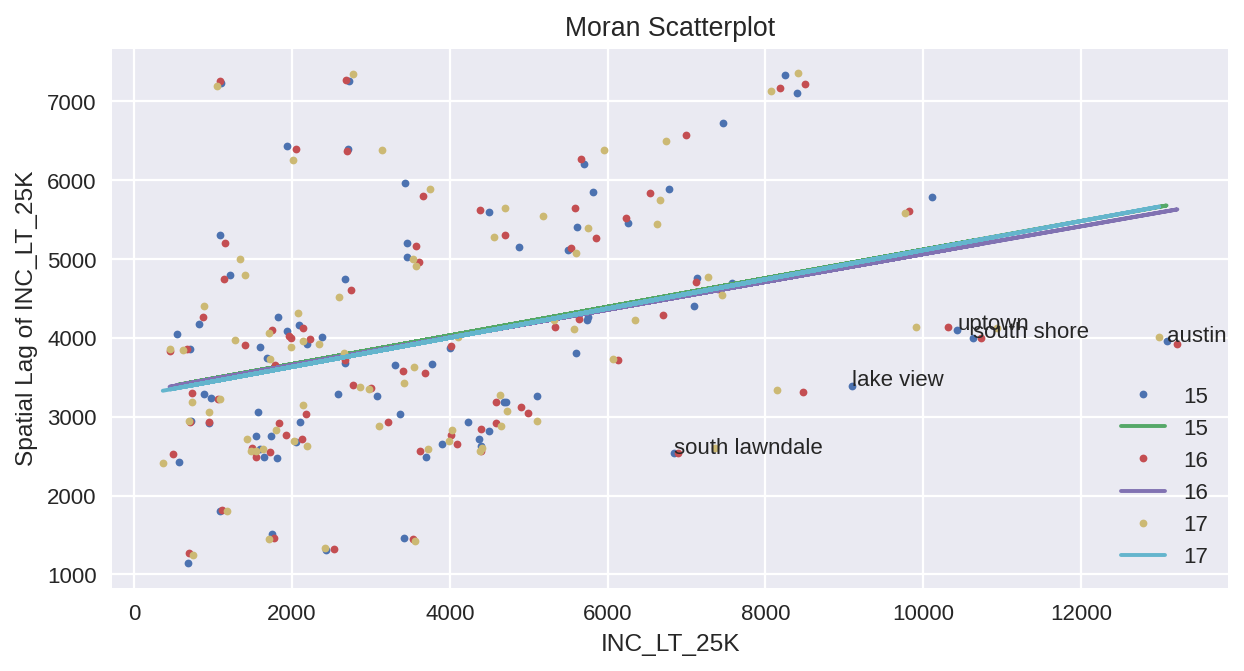

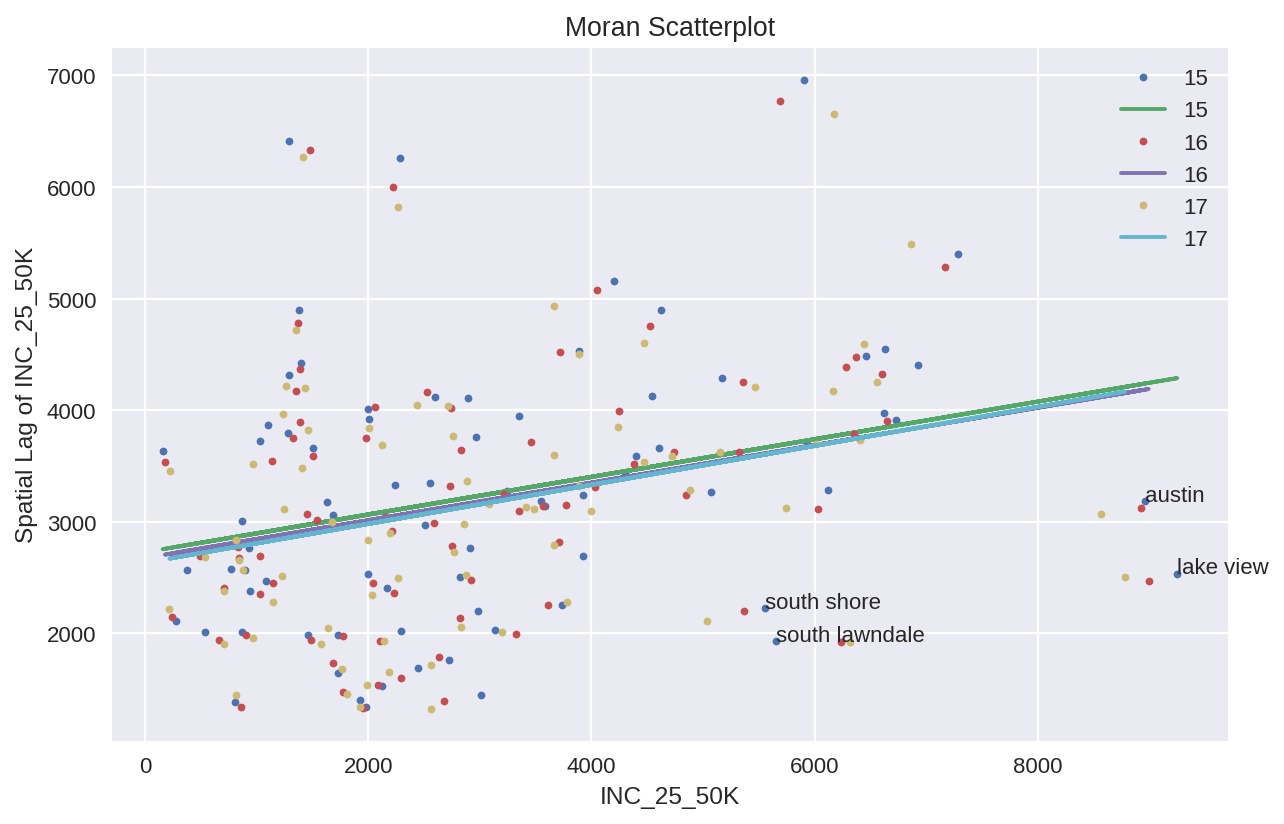

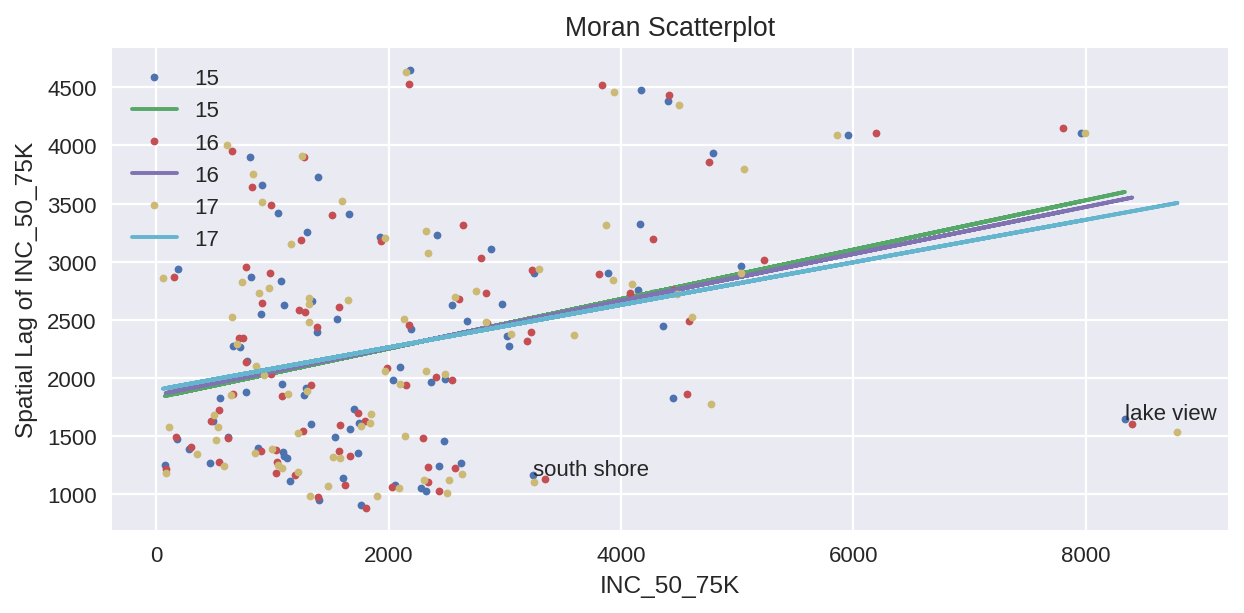

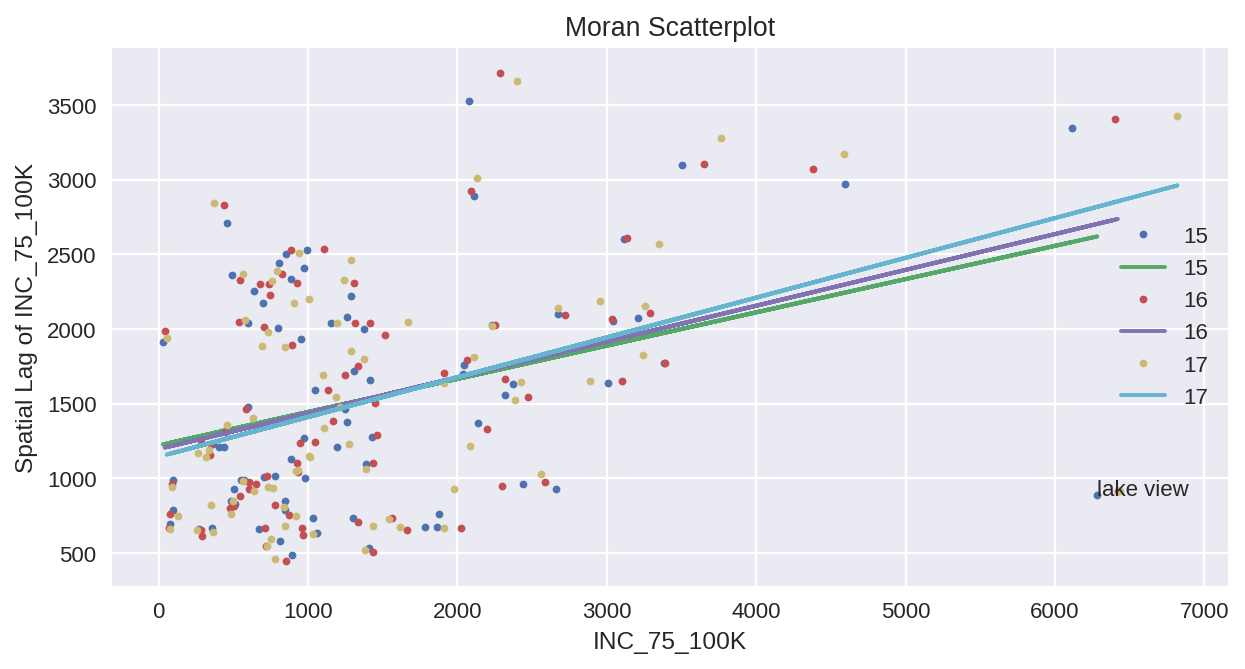

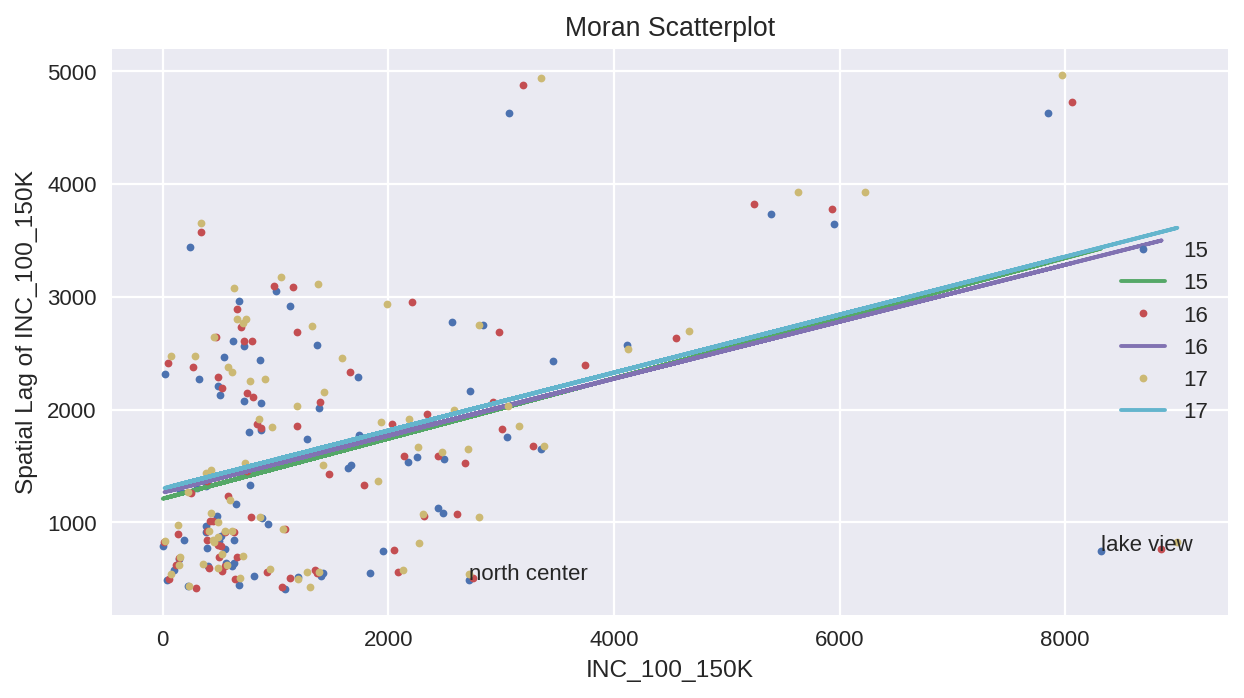

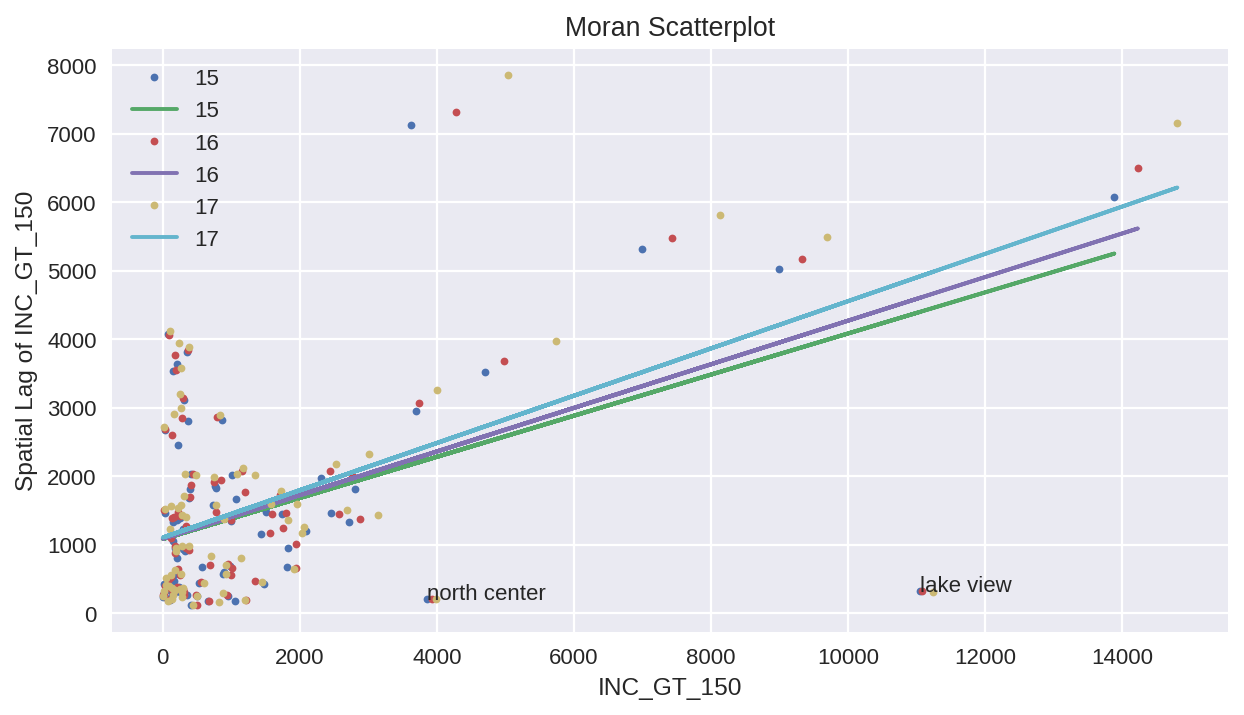

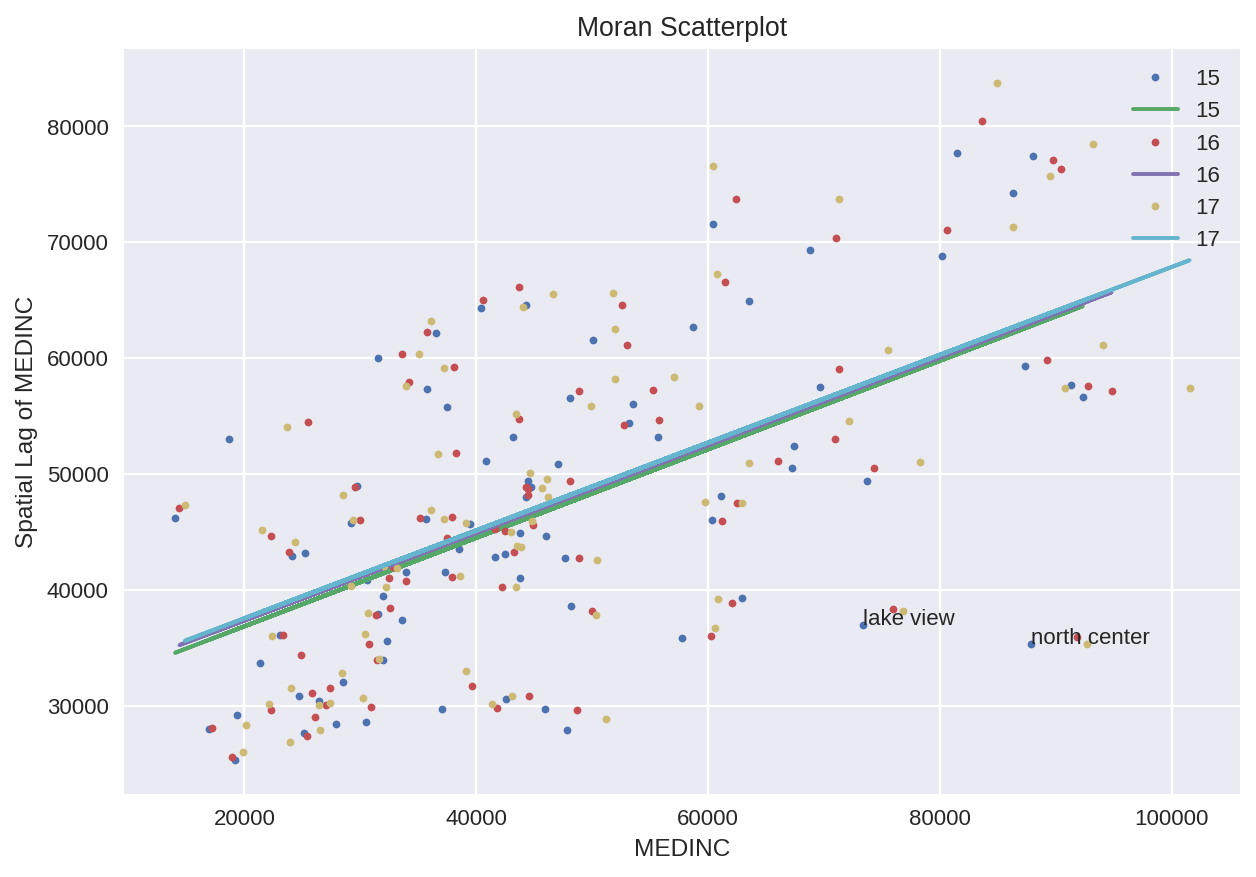

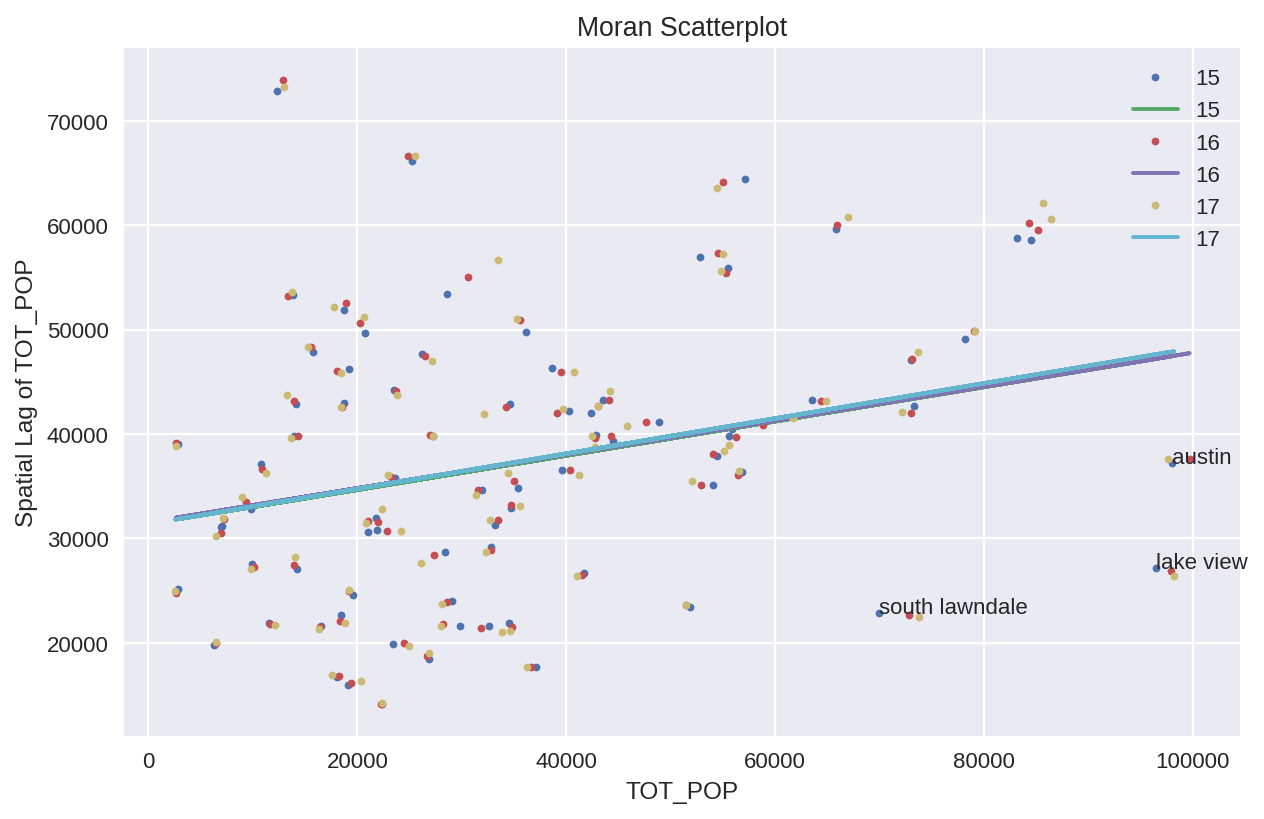

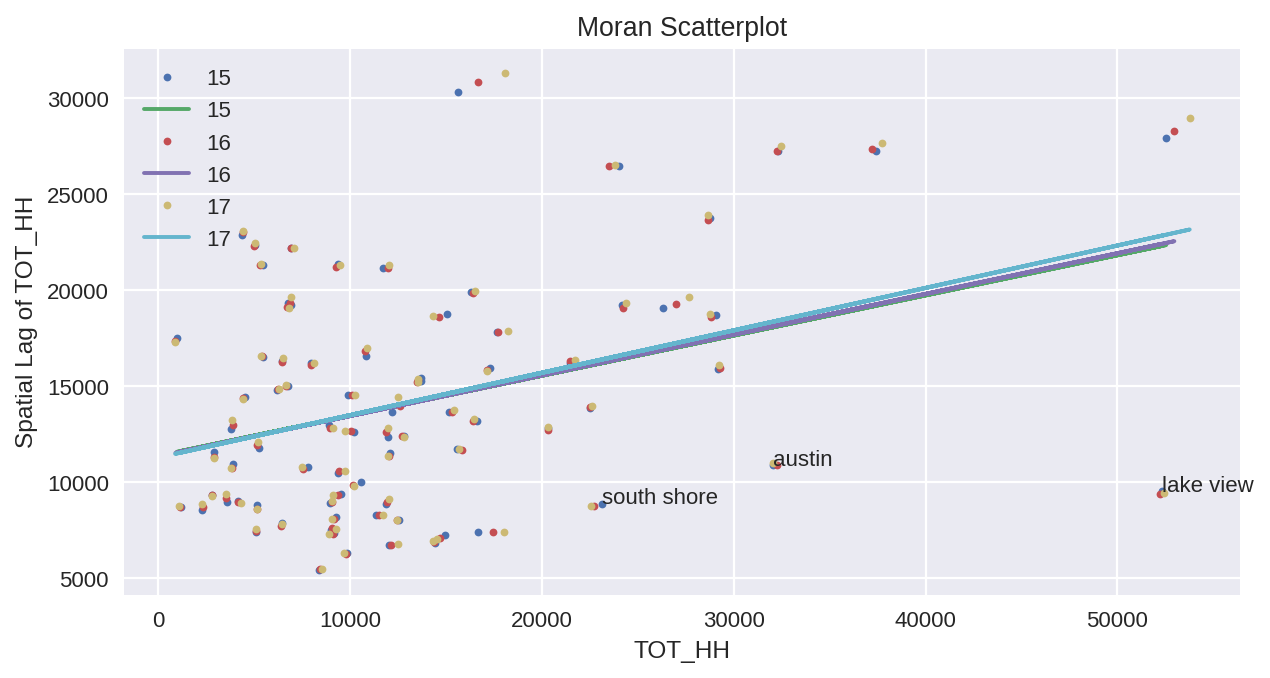

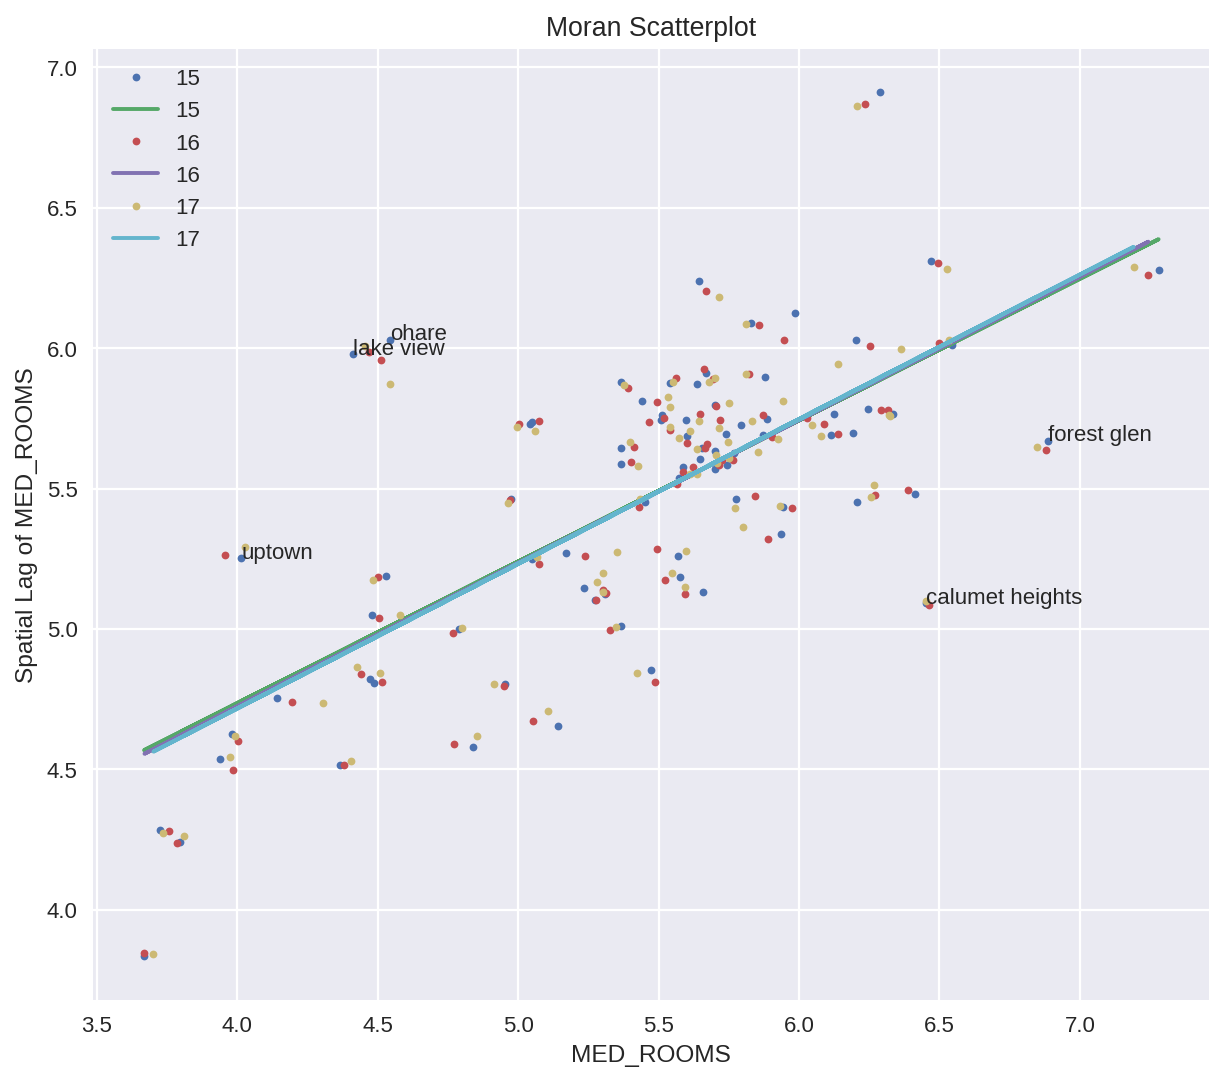

In [166]:
sel_columns=['WHITE', 'HISP', 'BLACK', 'ASIAN', 'OTHER', 'UND19', 'A20_34',
       'A35_49', 'A50_64', 'A65_79', 'OV80', 'MED_AGE', 'IN_LBFRC', 'EMP',
       'UNEMP', 'NOT_IN_LBFRC', 'MED_HV', 'INC_LT_25K', 'INC_25_50K',
       'INC_50_75K', 'INC_75_100K', 'INC_100_150K', 'INC_GT_150',
       'MEDINC',  'TOT_POP', 'TOT_HH', 'MED_ROOMS']

for sel in sel_columns:
    moran_scatter_plot(sel,wq,[ecodata15,ecodata16,ecodata17],['15','16','17'],lable_ratio=2)

## normalize by total population

In [116]:
ecodata15_norm.head()

WHITE      HISP     BLACK     ASIAN     OTHER     UND19  \
GEOG                                                                          
douglas          0.119482  0.026633  0.712121  0.128552  0.013212  0.212645   
oakland          0.016808  0.032015  0.925084  0.023851  0.002241  0.346566   
fuller park      0.027555  0.079526  0.883851  0.005232  0.003837  0.261946   
grand boulevard  0.042750  0.028187  0.904896  0.004467  0.019700  0.283883   
kenwood          0.177793  0.041341  0.696521  0.064092  0.020254  0.211198   

                   A20_34    A35_49    A50_64    A65_79  ...  IN_LBFRC  \
GEOG                                                     ...             
douglas          0.301929  0.177100  0.167872  0.092692  ...  0.499214   
oakland          0.196254  0.208580  0.148871  0.078278  ...  0.476389   
fuller park      0.197768  0.159051  0.186955  0.164981  ...  0.388559   
grand boulevard  0.195926  0.230323  0.159787  0.098678  ...  0.482757   
kenwood          0.261584  0.171633  0.196160  0.114977  ...  0.496976   

                      EMP     UNEMP  NOT_IN_LBFRC  INC_LT_25K  INC_25_50K  \
GEOG                                                                        
douglas          0.400021  0.099193      0.364056    0.204572    0.100923   
oakland          0.337922  0.138466      0.246198    0.255323    0.085321   
fuller park      0.252878  0.135333      0.409487    0.245902    0.098012   
grand boulevard  0.358170  0.123023      0.292594    0.196194    0.088314   
kenwood          0.419677  0.077299      0.321625    0.186893    0.117862   

                 INC_50_75K  INC_75_100K  INC_100_150K  INC_GT_150  
GEOG                                                                
douglas            0.084408     0.035074      0.028992    0.017144  
oakland            0.044501     0.015688      0.022891    0.028494  
fuller park        0.025462     0.026160      0.012905    0.005232  
grand boulevard    0.062539     0.039757      0.030153    0.023720  
kenwood            0.063925     0.045114      0.044948    0.048721  

[5 rows x 21 columns]

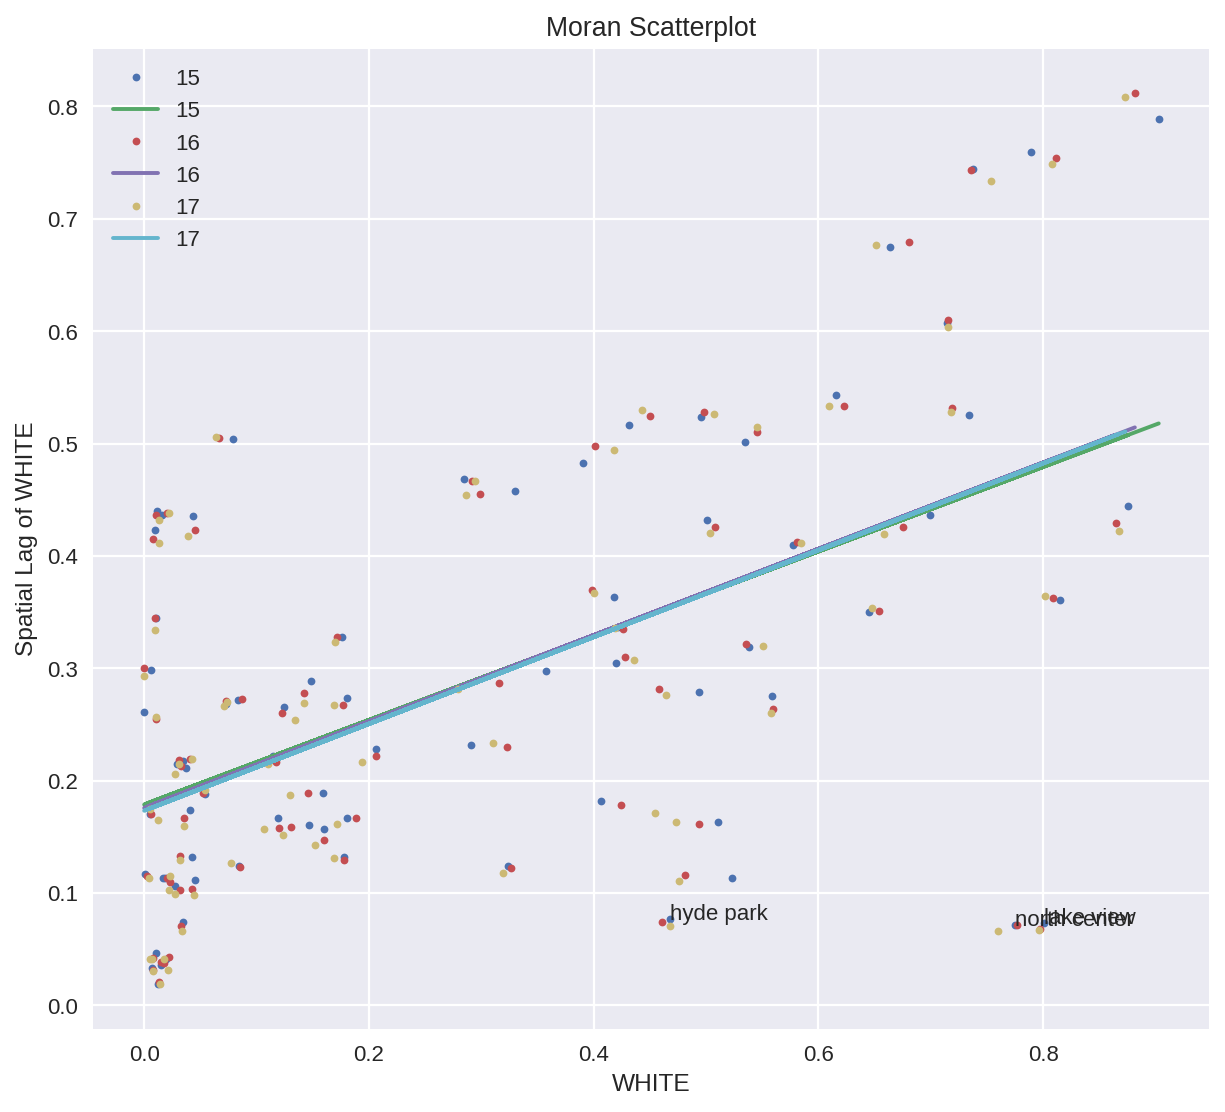

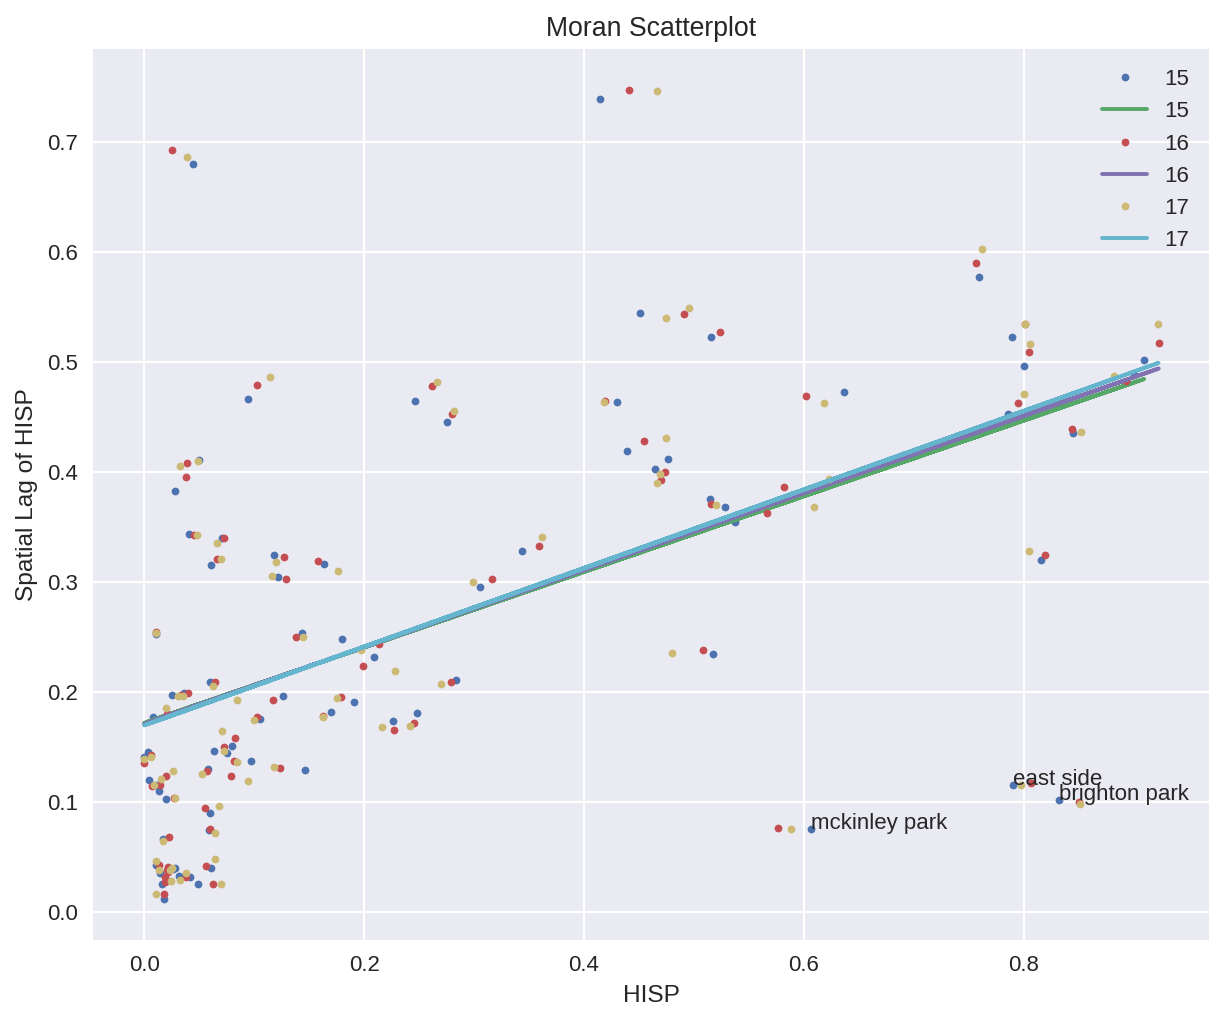

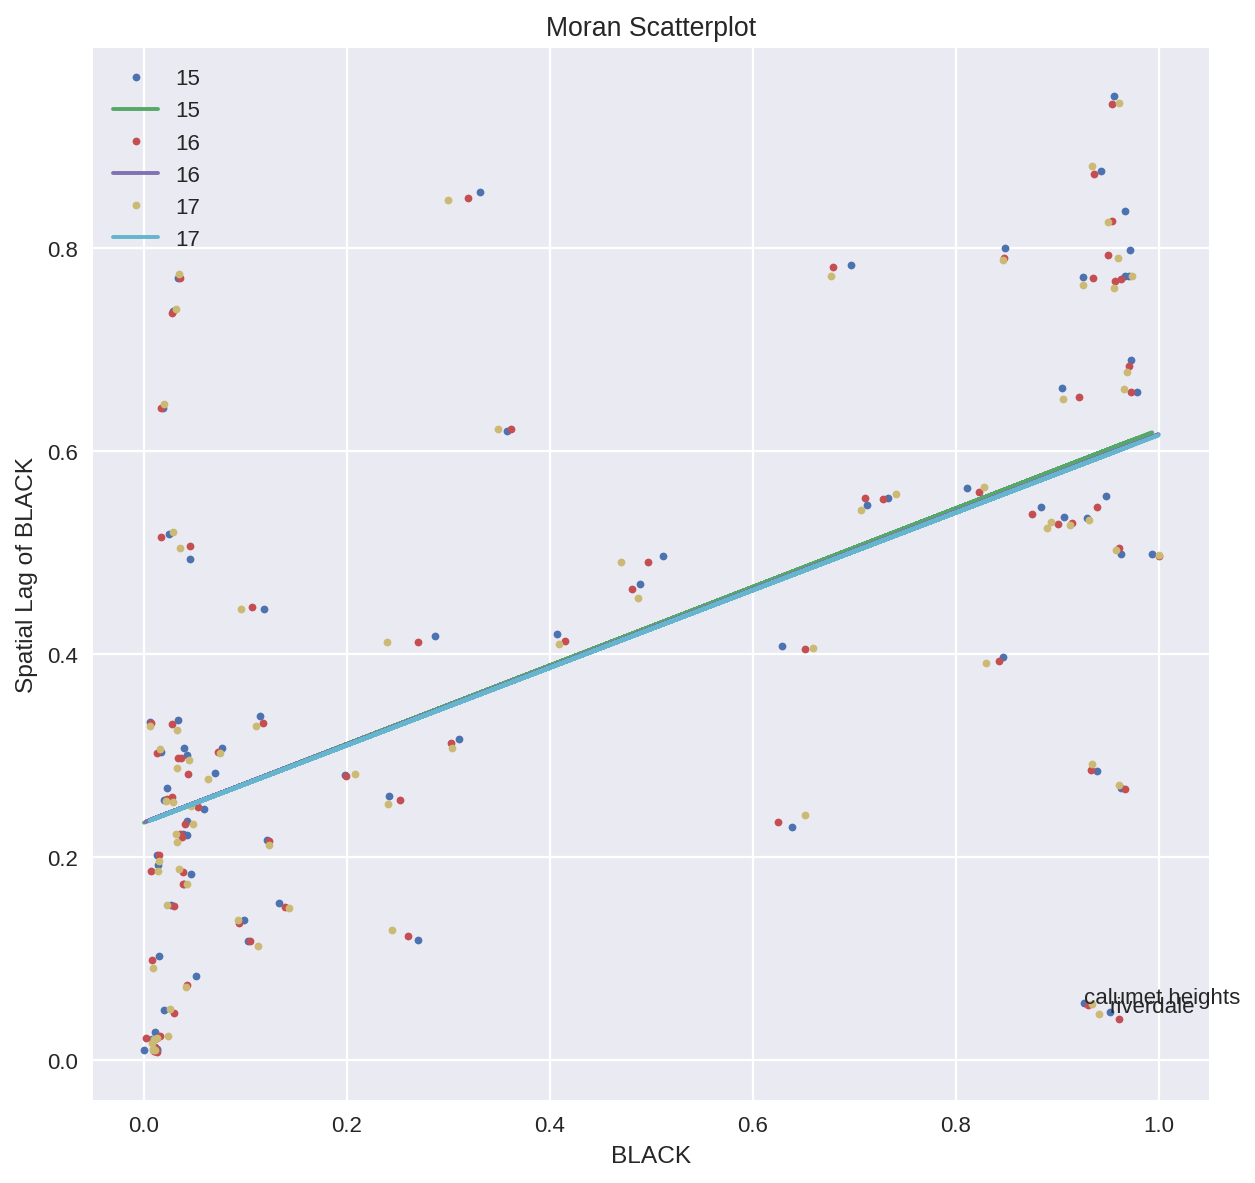

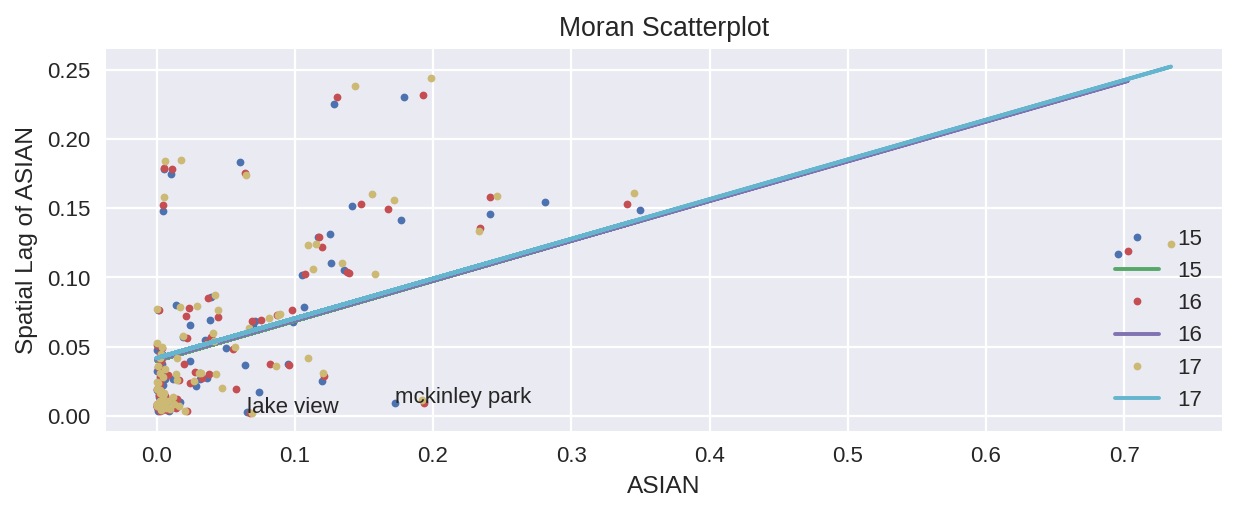

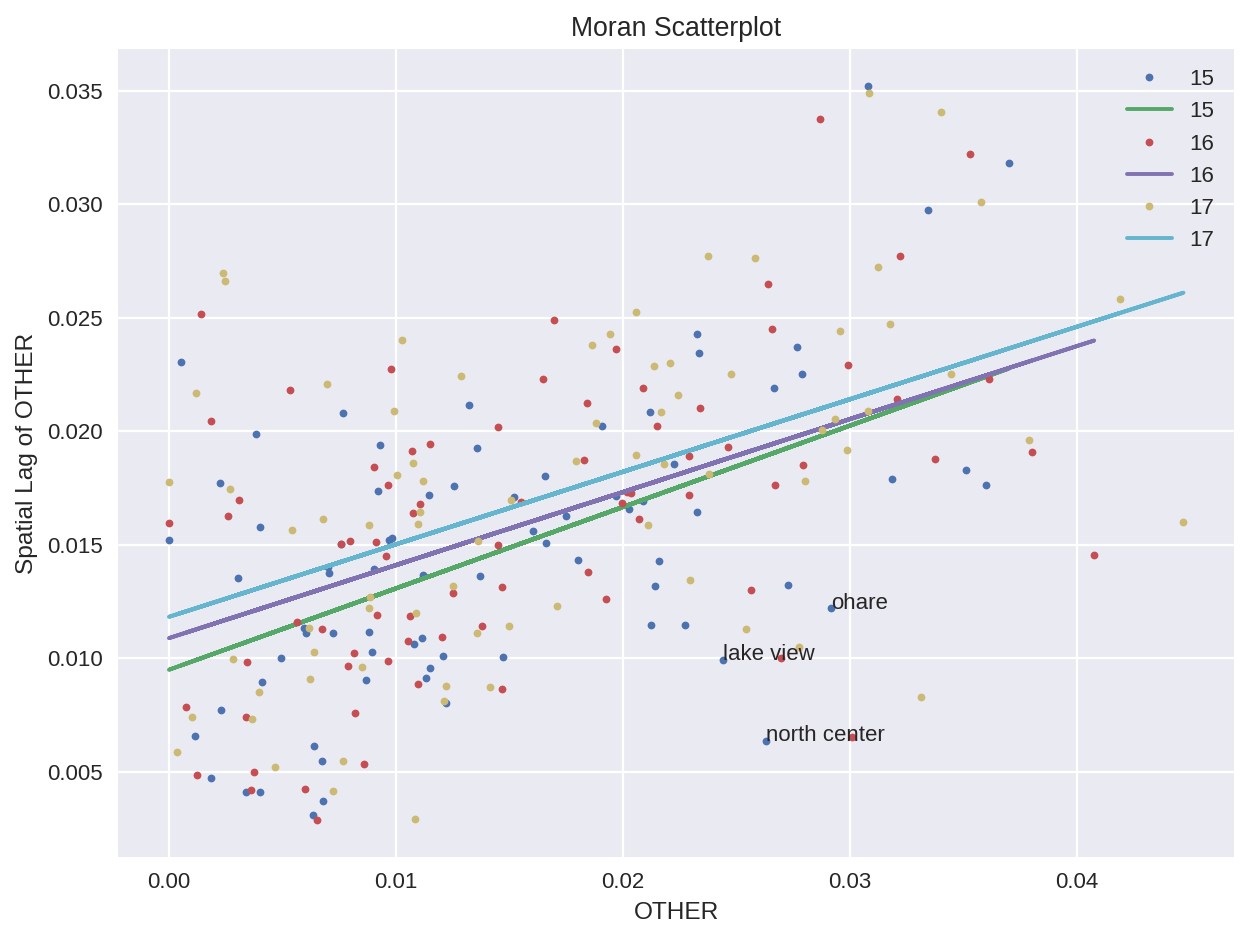

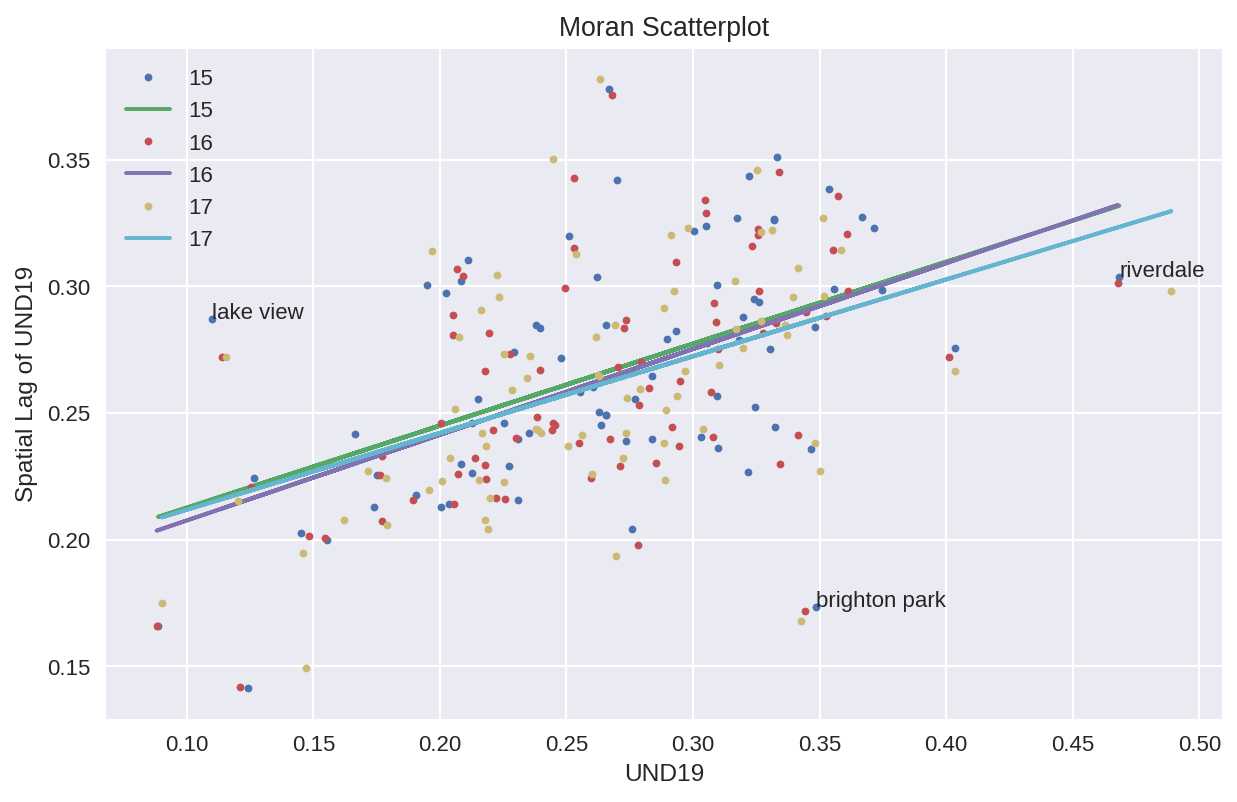

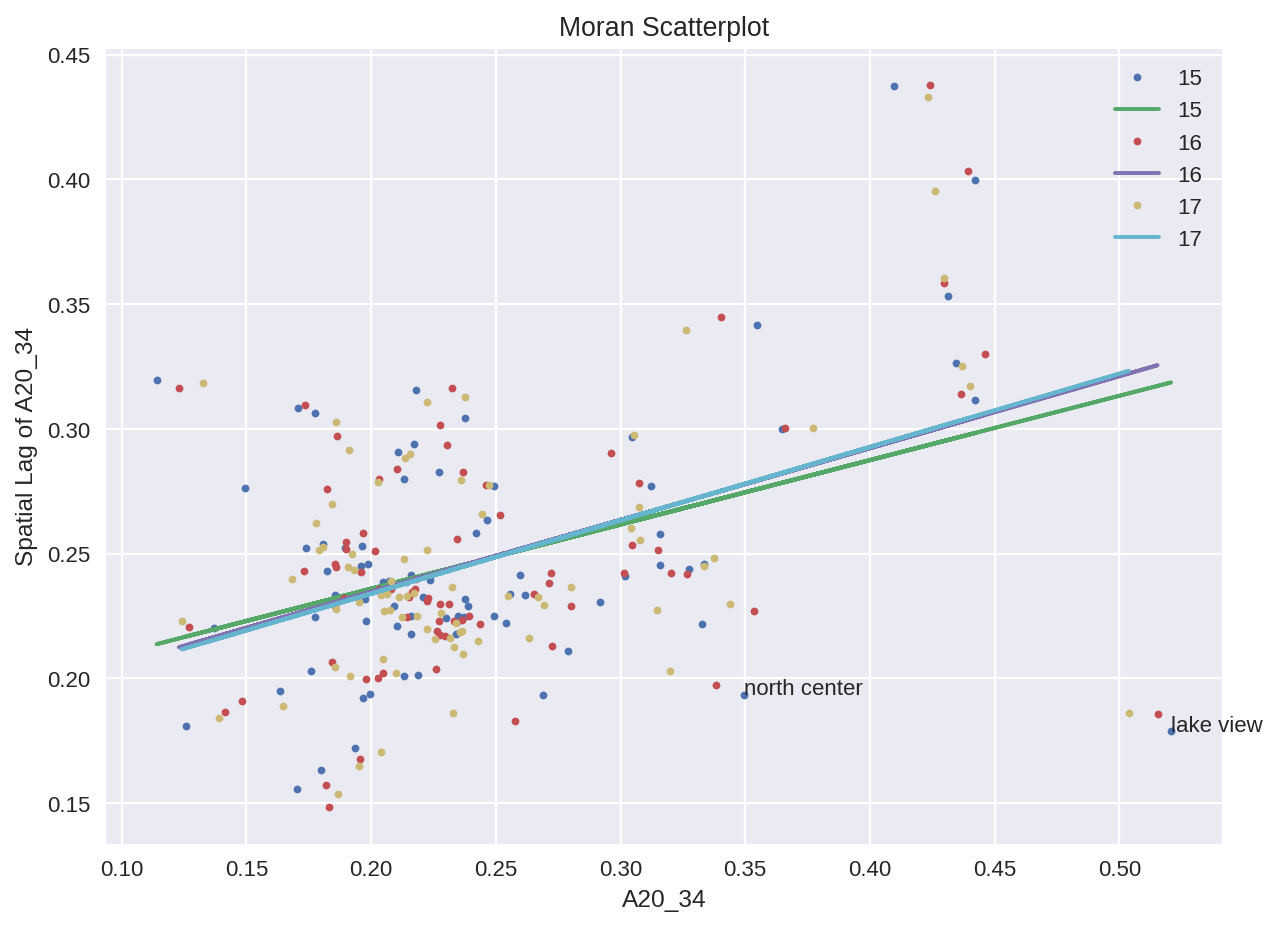

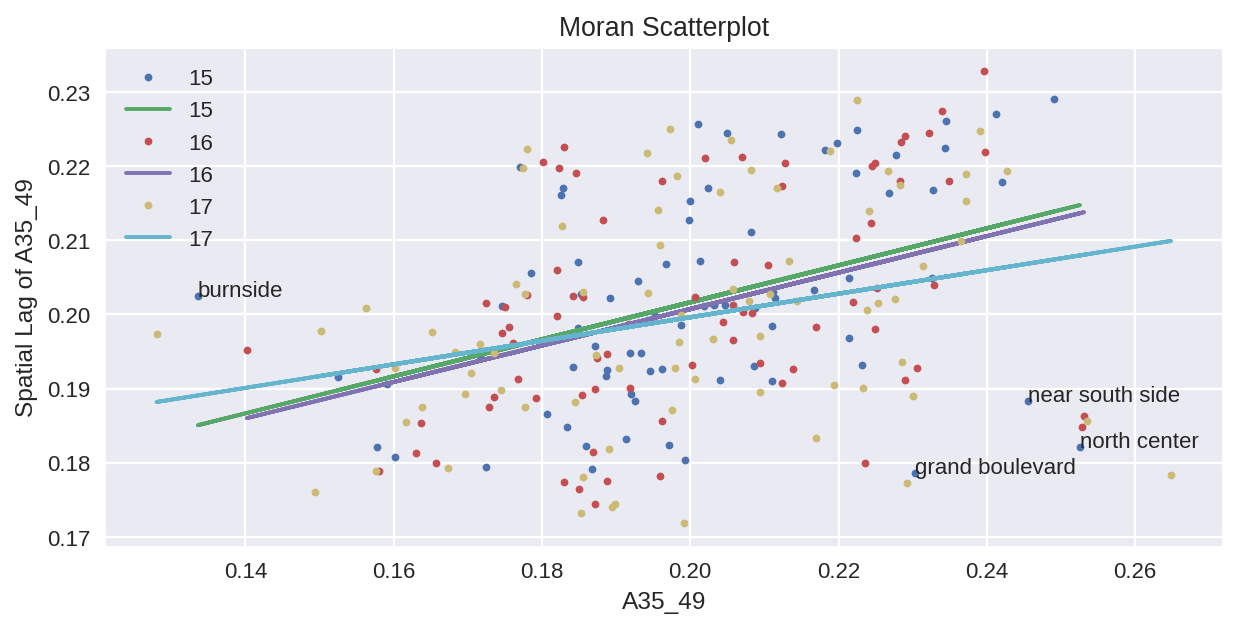

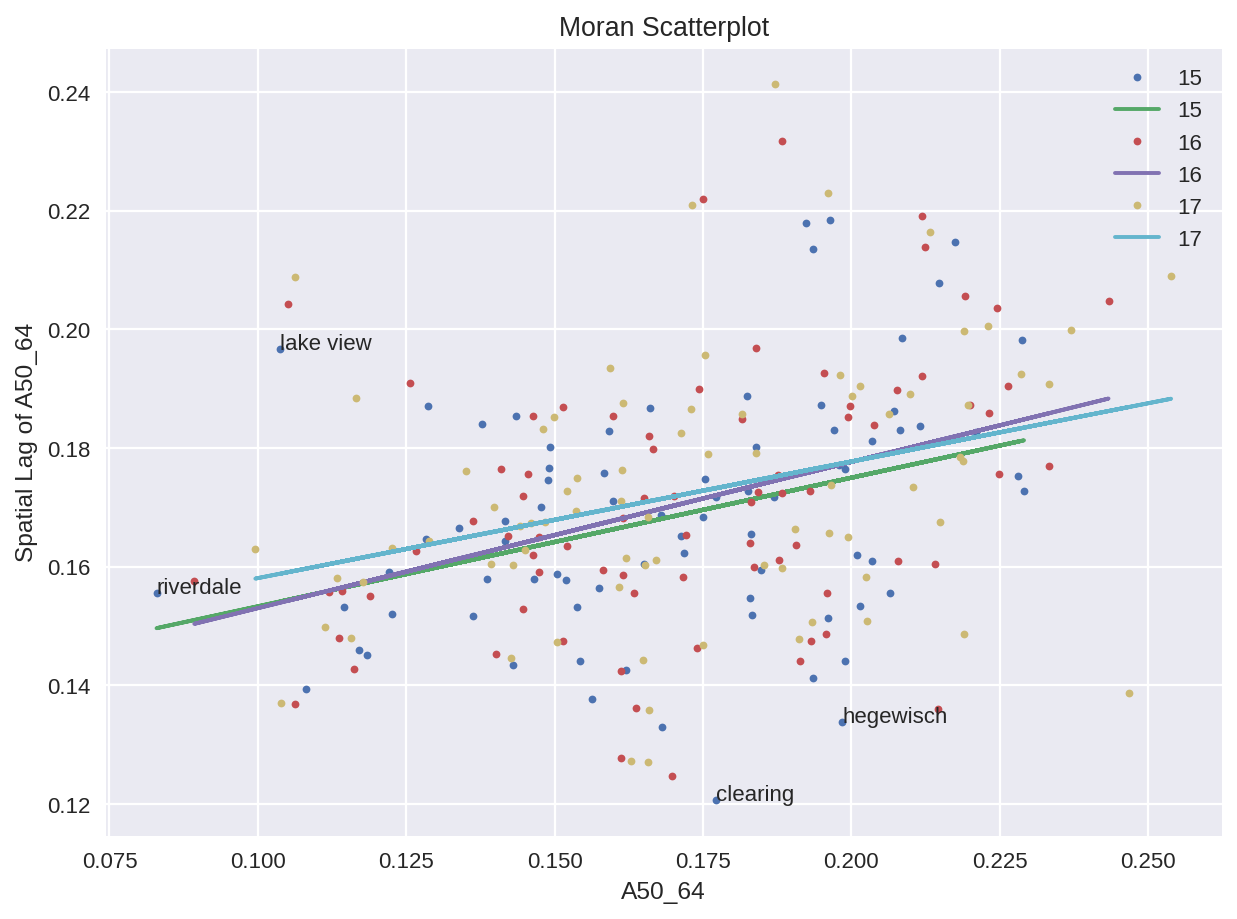

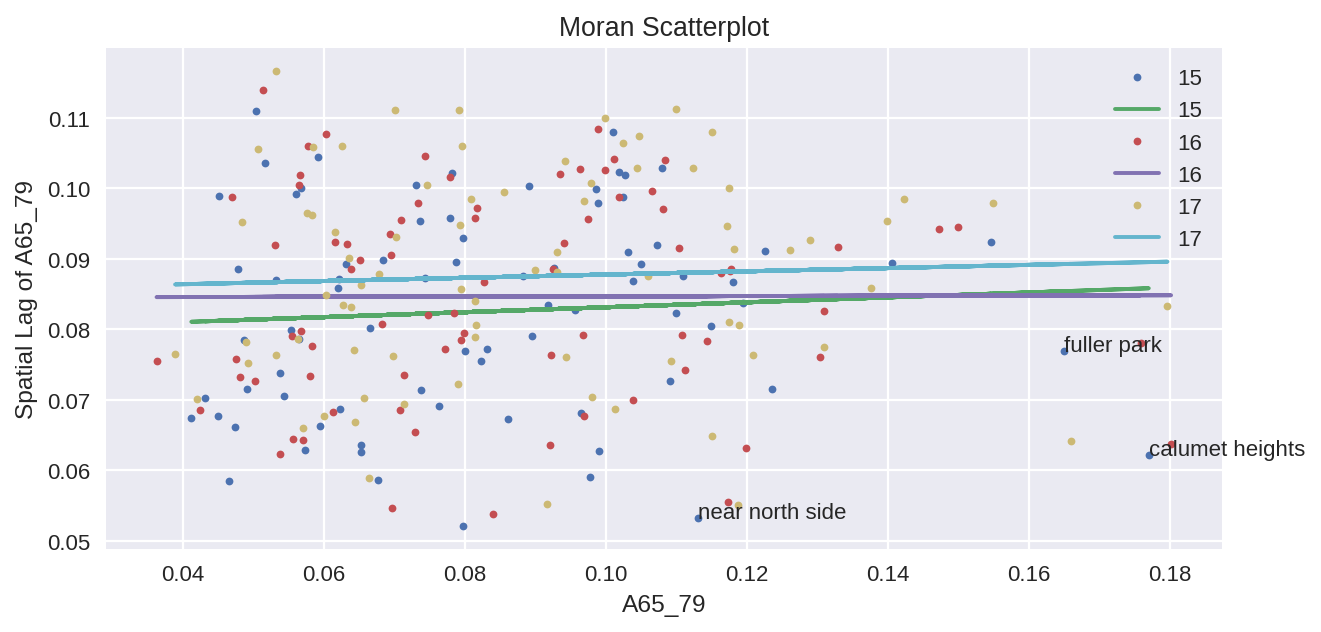

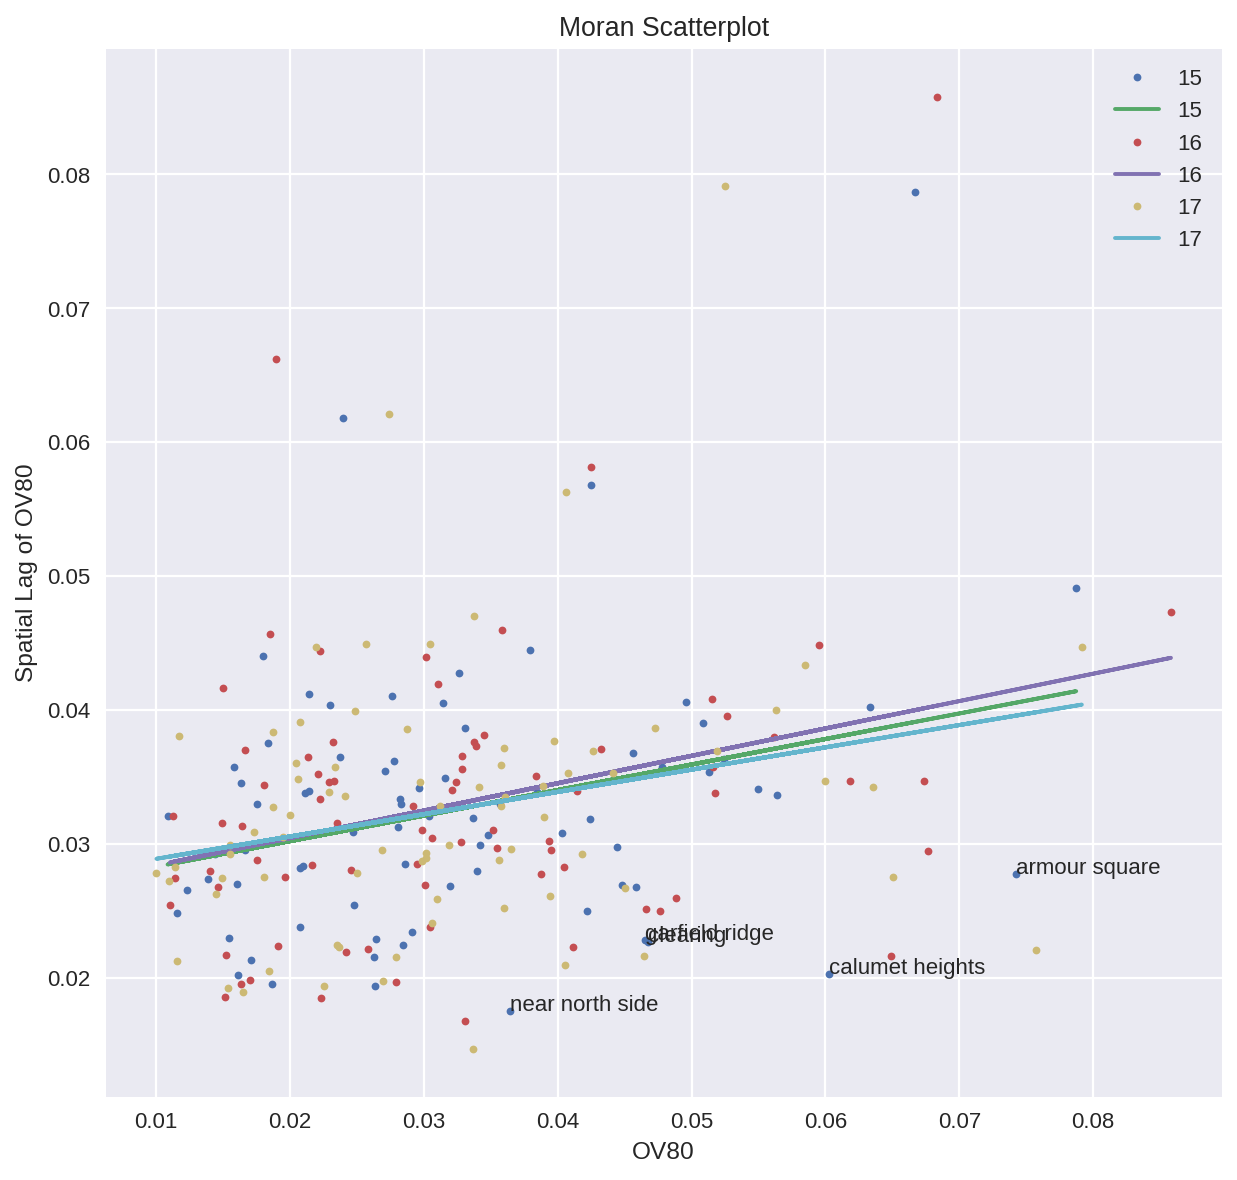

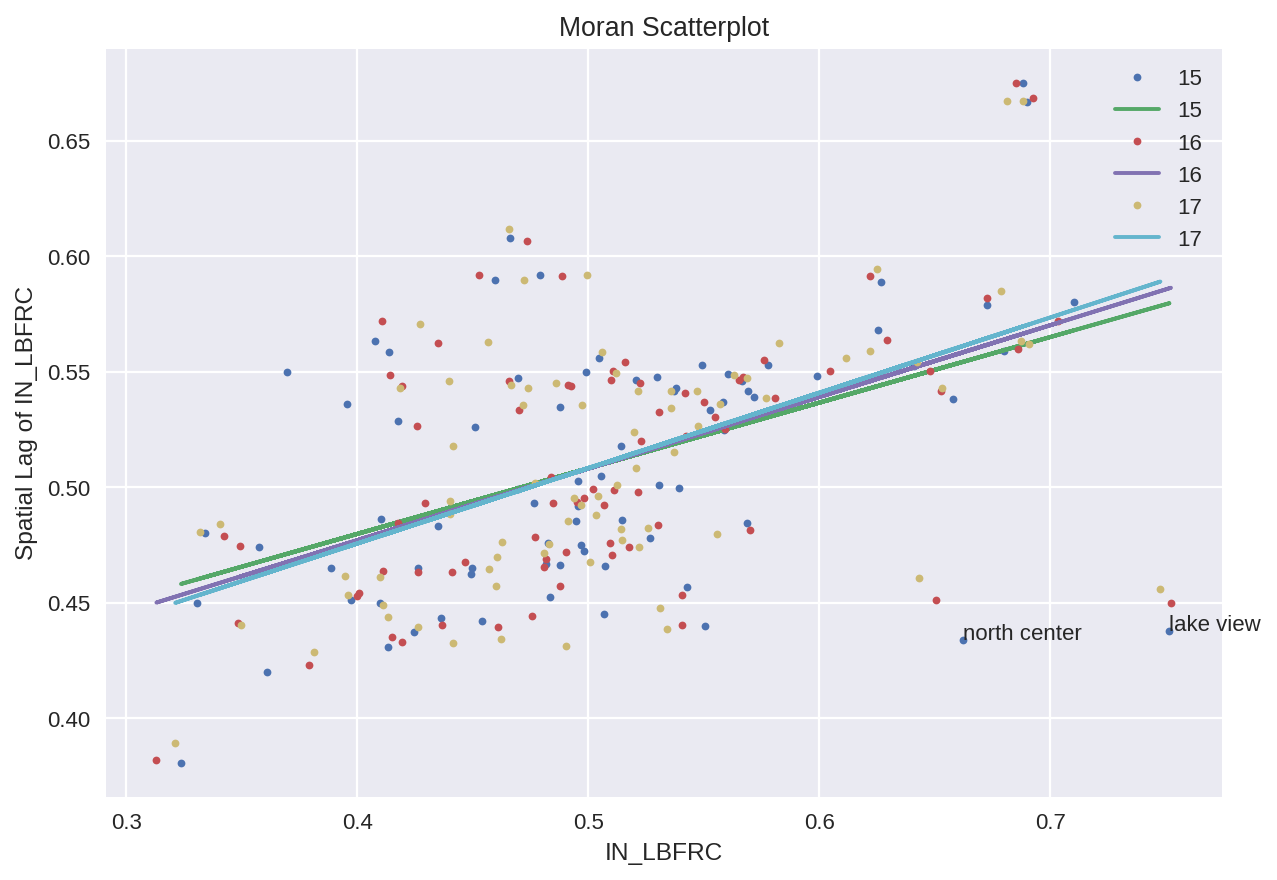

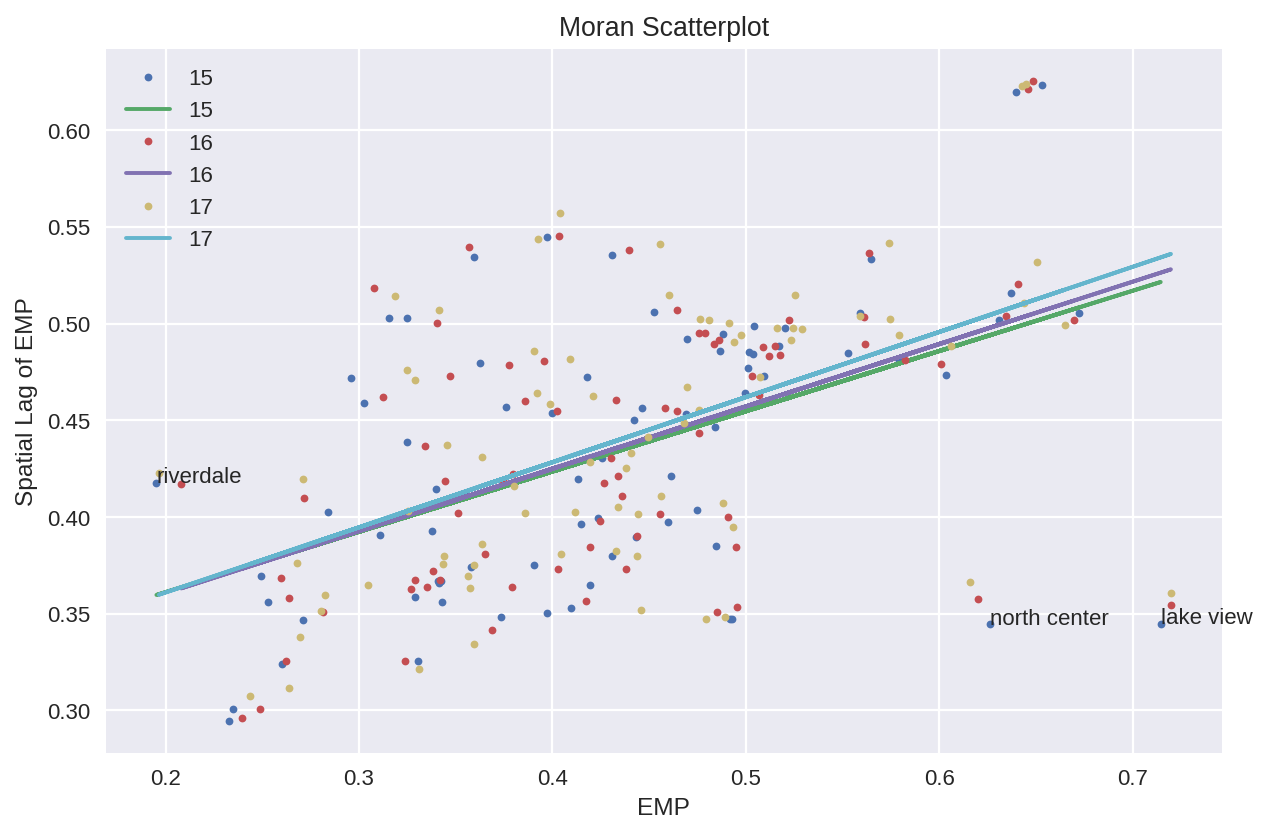

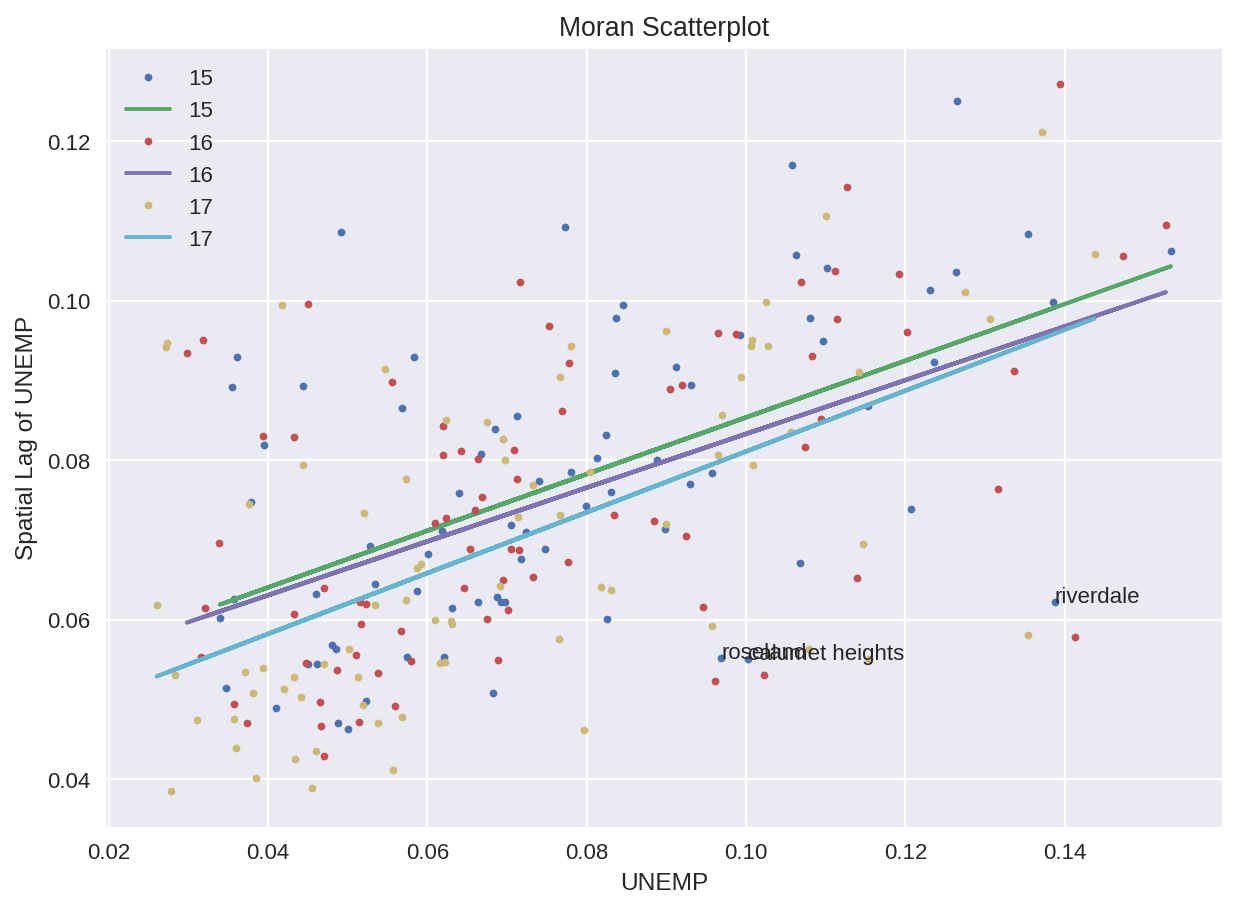

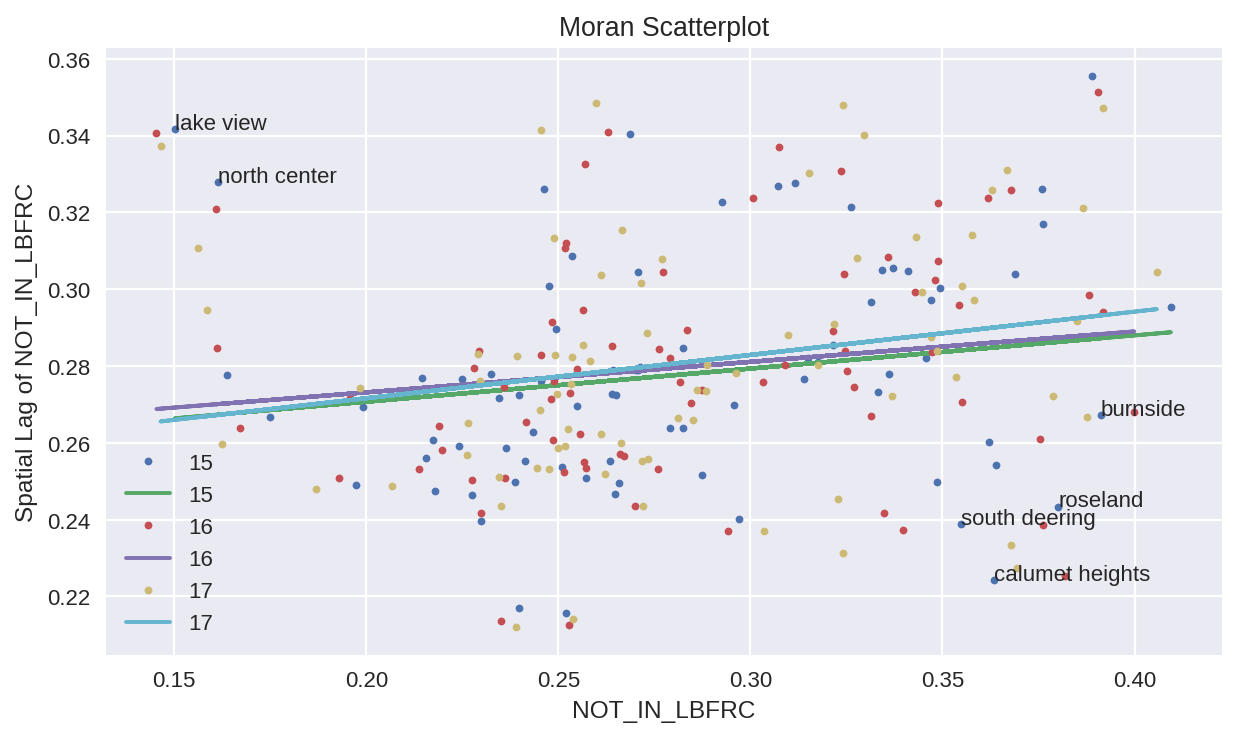

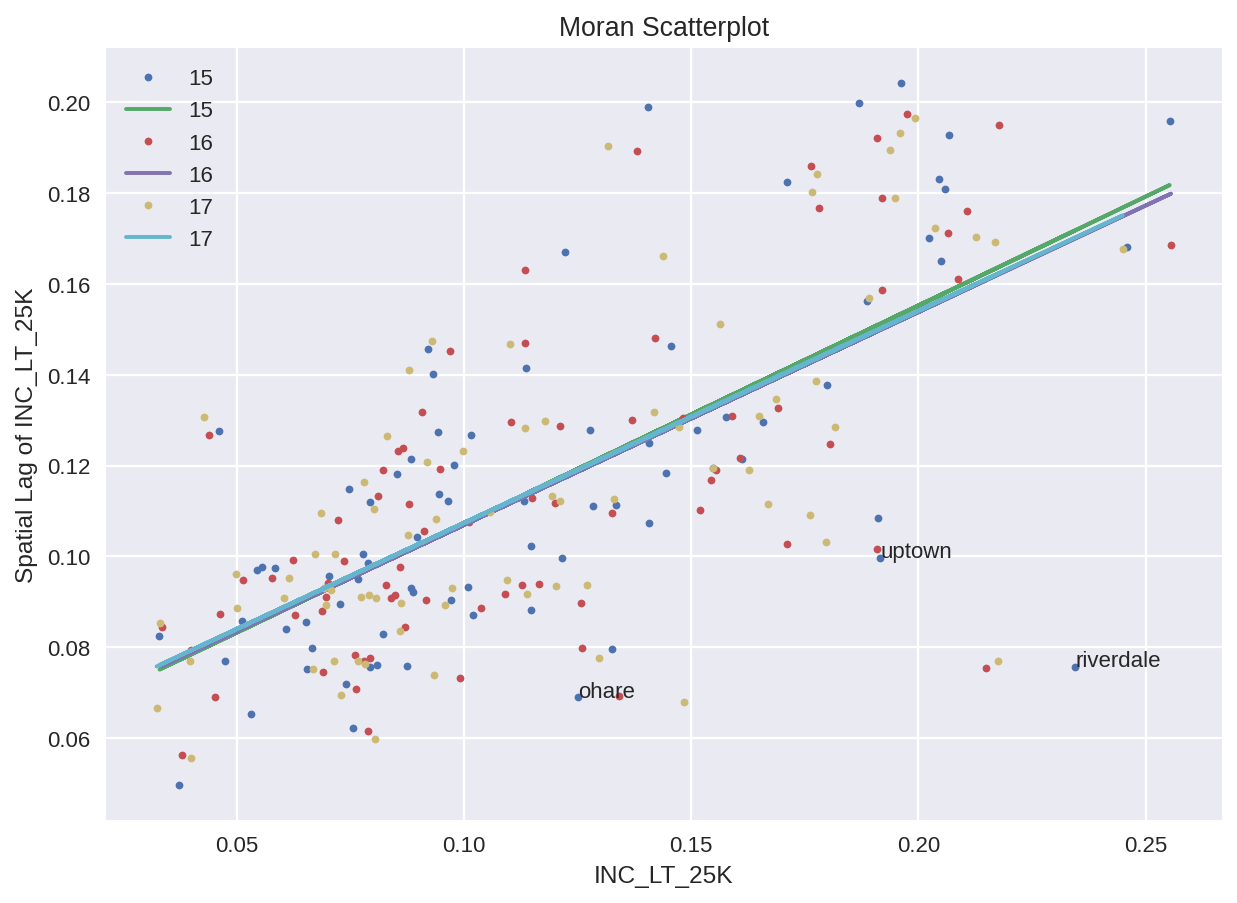

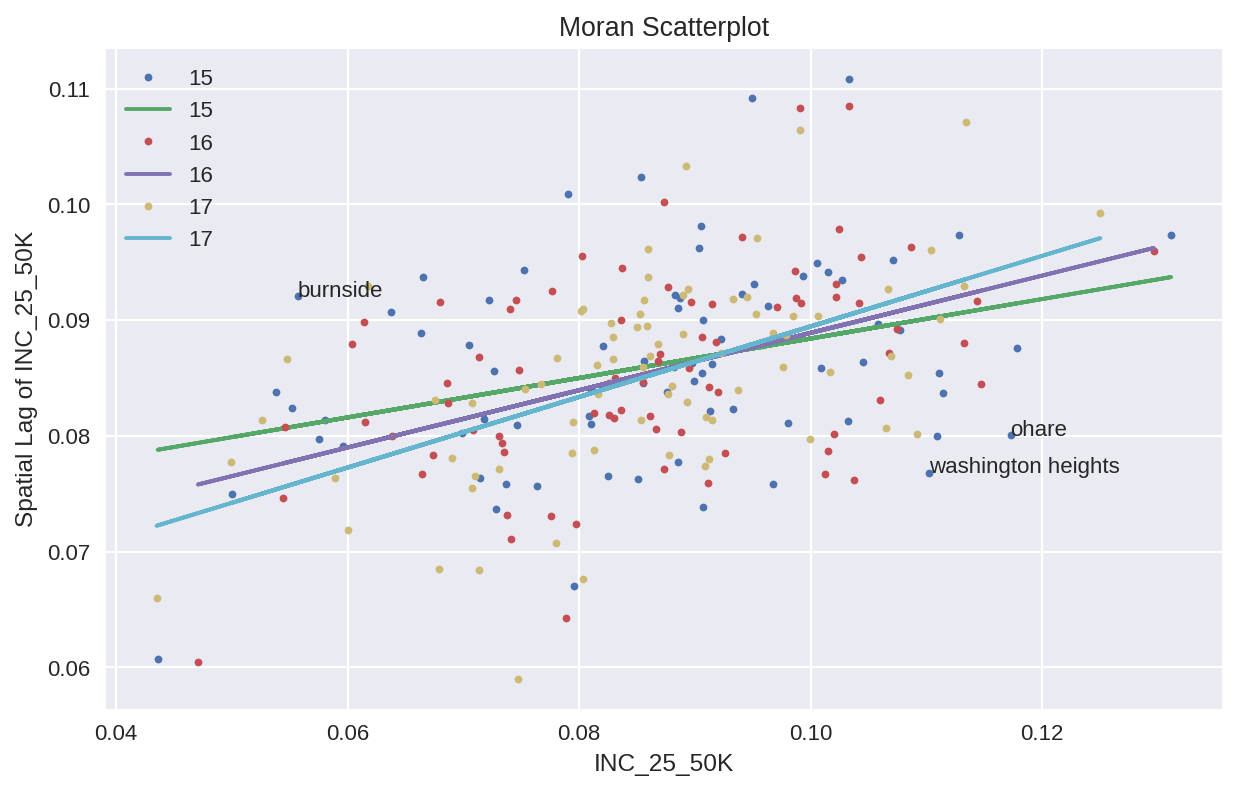

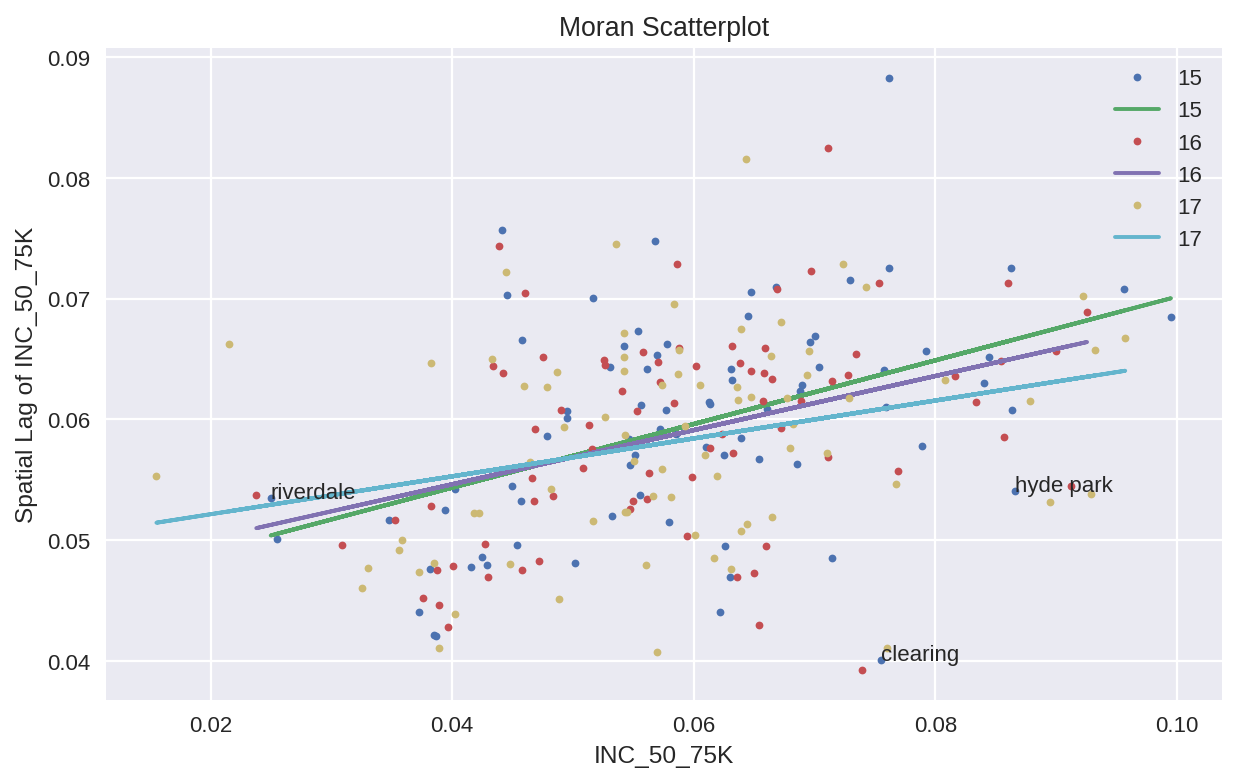

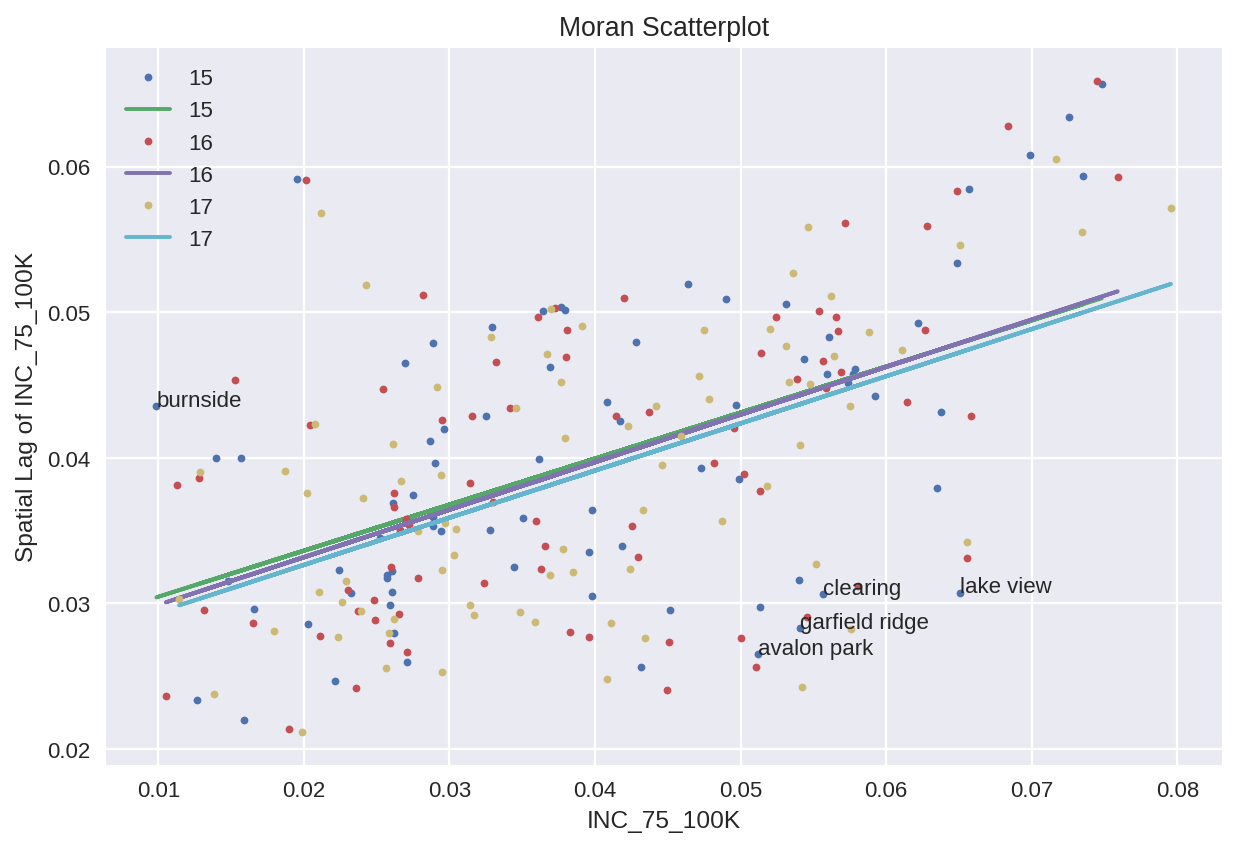

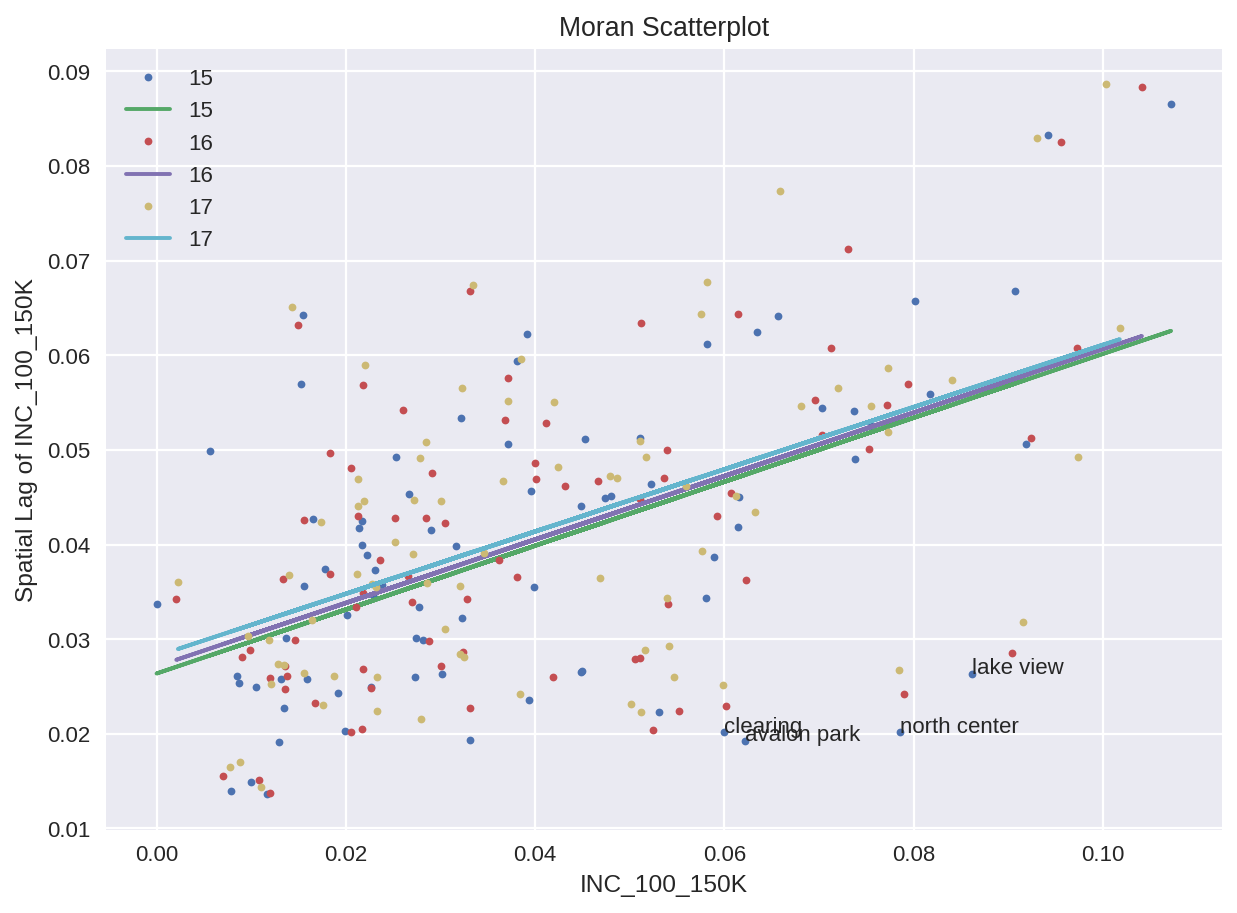

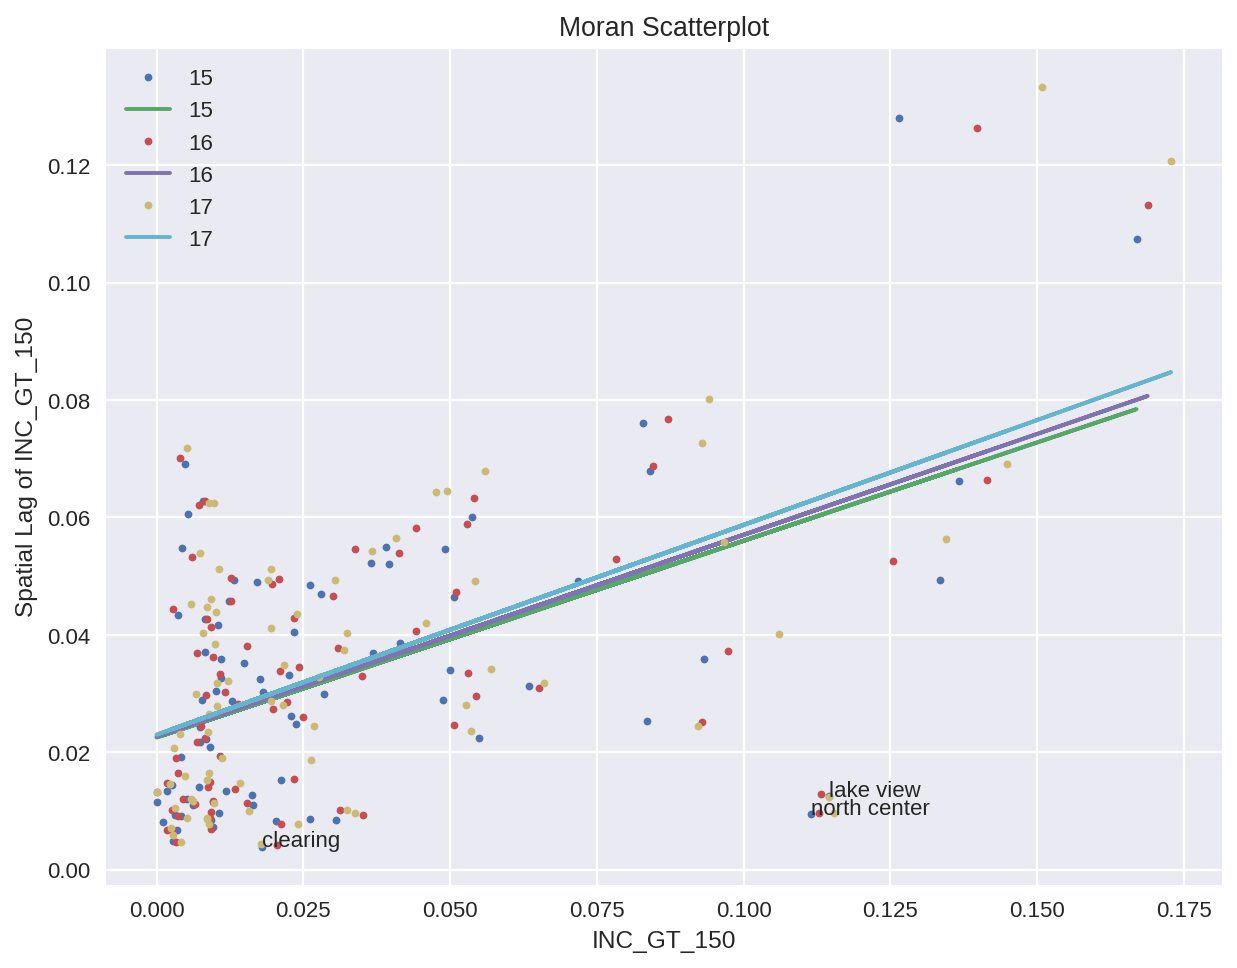

In [167]:
for sel in norm_cols:
    moran_scatter_plot(sel,wq,[ecodata15_norm,ecodata16_norm,ecodata17_norm],['15','16','17'],lable_ratio=2)

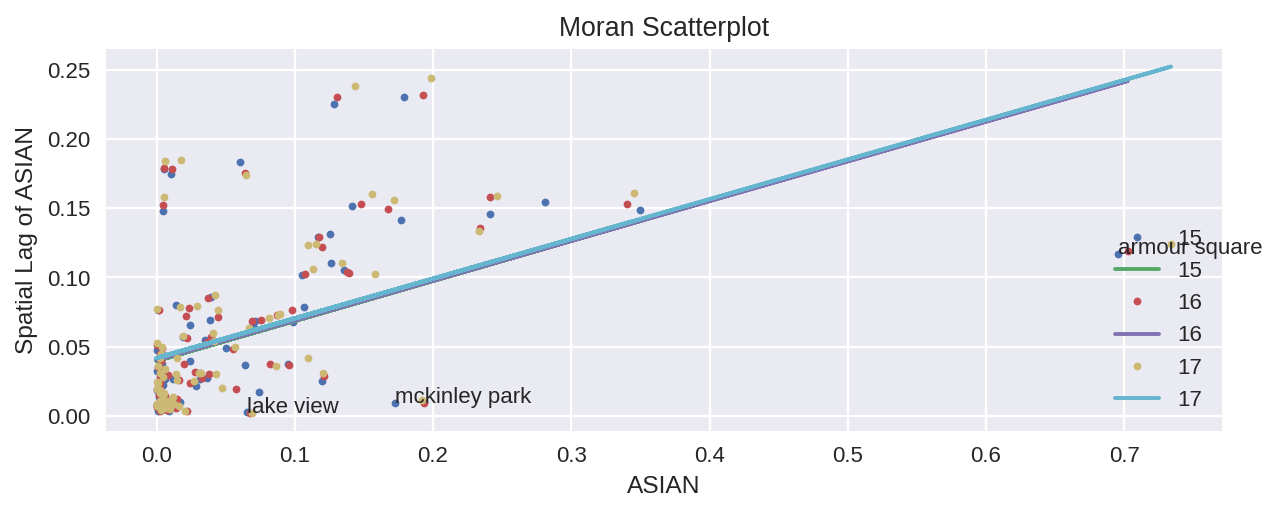

In [169]:
moran_scatter_plot('ASIAN',wq,[ecodata15_norm,ecodata16_norm,ecodata17_norm],['15','16','17'],lable_ratio=1)

 # spatial regression

In [177]:
import spreg

In [174]:
!pip install spreg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 7.9 MB/s eta 0:00:00m eta 0:00:01


In [216]:
x.shape

(308, 1)

In [217]:
x=ecodata15[['MEDINC','ASIAN','INC_GT_150','UND19']].values
y=ecodata15['MED_HV'].values.reshape(-1,1)

ols = spreg.OLS(y, x, w=lps.weights.Rook.from_dataframe(ecodata15), spat_diag=True, moran=True, 
                name_y='home value', name_x=['MEDINC','ASIAN','INC_GT_150','UND19'],  white_test=True)

/tmp/ipykernel_2024352/129969612.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  ols = spreg.OLS(y, x, w=lps.weights.Rook.from_dataframe(ecodata15), spat_diag=True, moran=True,


In [218]:
ols.moran_res

(0.5177650141319201, 8.01756744346692, 1.078598637062119e-15)

In [219]:
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  home value                Number of Observations:          77
Mean dependent var  : 223159.2773                Number of Variables   :           5
S.D. dependent var  :  90425.7876                Degrees of Freedom    :          72
R-squared           :      0.7324
Adjusted R-squared  :      0.7176
Sum squared residual: 1.66274e+11                F-statistic           :     49.2738
Sigma-square        :2309361960.622                Prob(F-statistic)     :   6.677e-20
S.E. of regression  :   48055.821                Log likelihood        :    -936.743
Sigma-square ML     :2159403391.750                Akaike info criterion :    1883.485
S.E of regression ML:  46469.3812                Schwarz criterion     :    1895.204

--------------------------------------------------------

In [202]:
ols_noweight = spreg.OLS(y, x, name_y='home value', name_x=['income'],  white_test=True)
print(ols_noweight.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :  home value                Number of Observations:          77
Mean dependent var  : 223159.2773                Number of Variables   :           2
S.D. dependent var  :  90425.7876                Degrees of Freedom    :          75
R-squared           :      0.5922
Adjusted R-squared  :      0.5868
Sum squared residual: 2.53403e+11                F-statistic           :    108.9276
Sigma-square        :3378712335.329                Prob(F-statistic)     :   2.907e-16
S.E. of regression  :   58126.692                Log likelihood        :    -952.964
Sigma-square ML     :3290953573.372                Akaike info criterion :    1909.929
S.E of regression ML:  57366.8334                Schwarz criterion     :    1914.616

--------------------------------------------------------

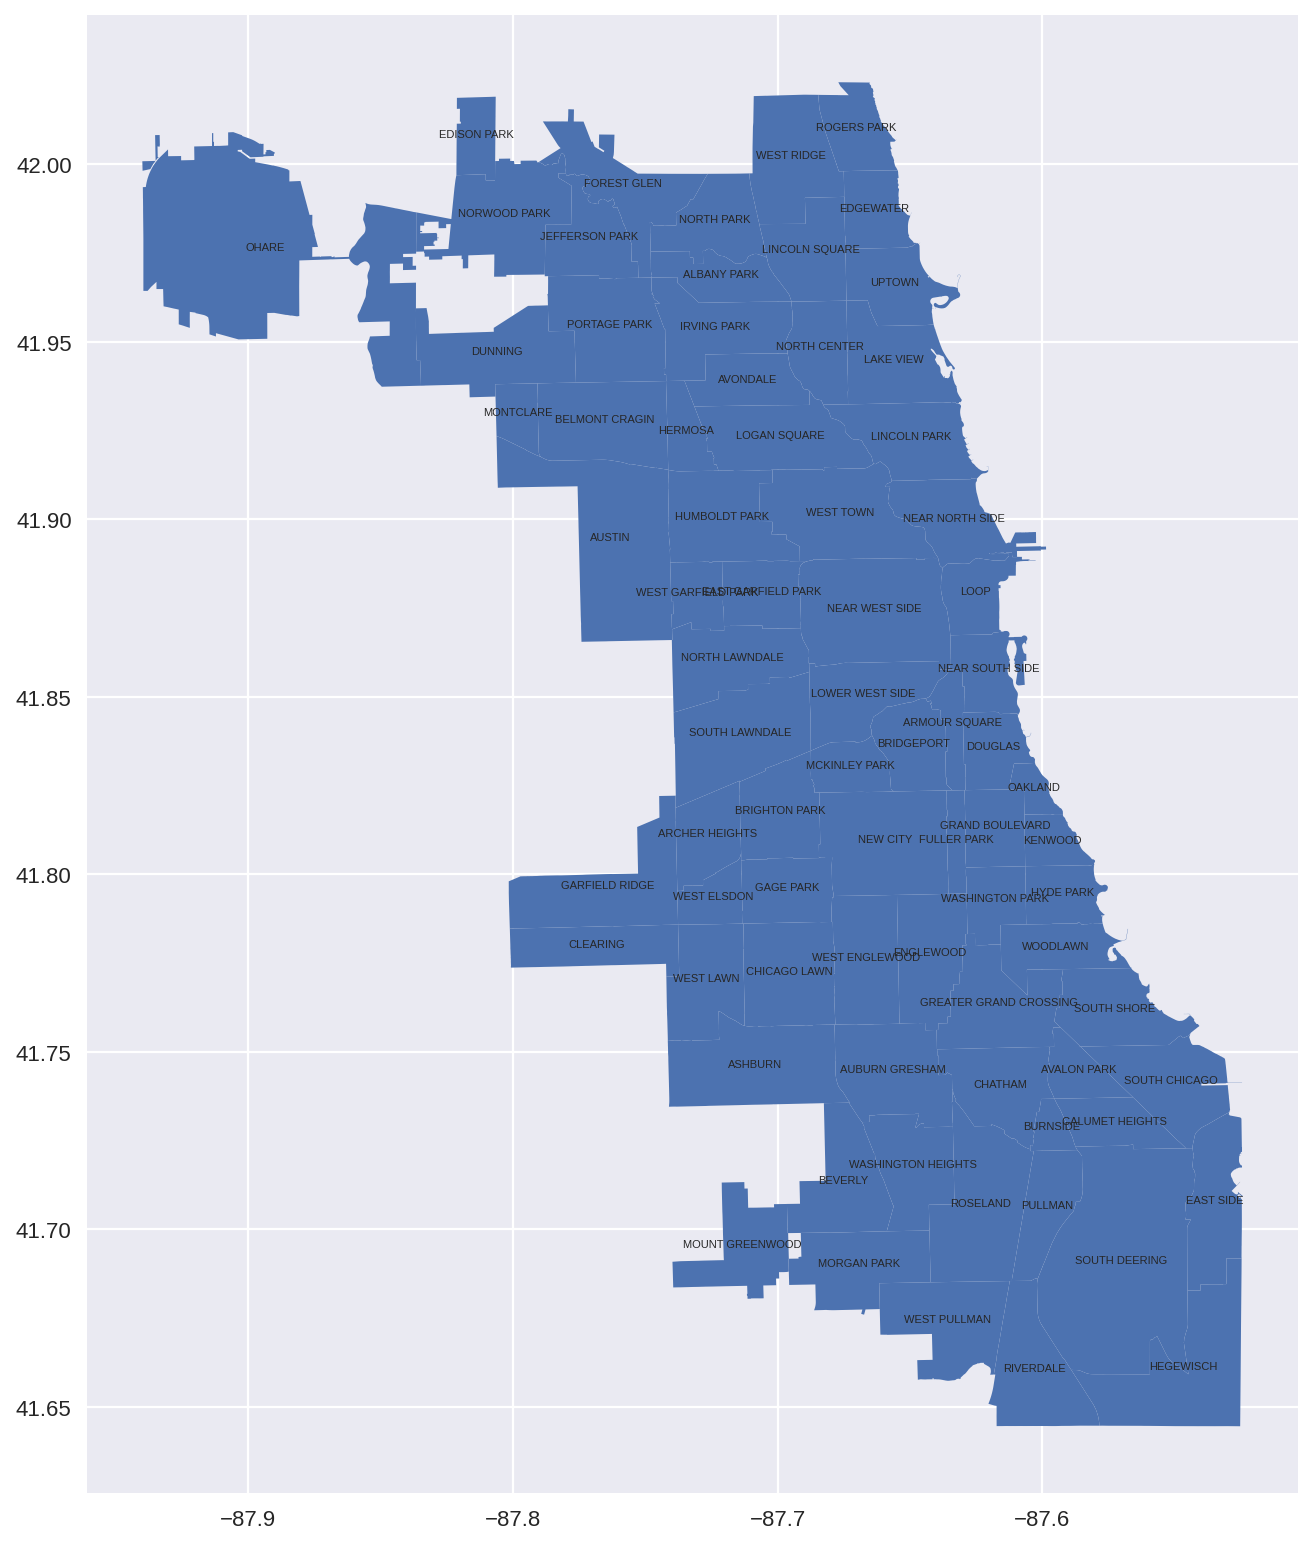

In [260]:
ax = ecodata15.plot(figsize=(12, 12))

ecodata15.apply(lambda x: ax.annotate(text=x.community, xy=x.geometry.centroid.coords[0], ha='center'
                                     ,fontsize=5), axis=1);